## SC1015 Mini Assignment Team 8
#### William Johnson U2220859A
#### Soo Ying Xi U2220021D
#### Tay Zhi Xian U2220099F
------------------------------------

#### Import Essential Libraries

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score,precision_score,recall_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

#Shows plots by default
%matplotlib inline

------------------------------------------
#### Importing the dataset

In [306]:
creditcardData=pd.read_csv("credit-approval_csv.csv")
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [307]:
creditcardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           678 non-null    object 
 1   Age              678 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          684 non-null    object 
 4   BankCustomer     684 non-null    object 
 5   EducationLevel   681 non-null    object 
 6   Ethnicity        681 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          677 non-null    float64
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
 16  Approved_Status  690 non-null    object 
dtypes: float64(4), i

#### Observations
1. There are `17` variables in total and `690` observations in the dataset. `Approved_Status` is the response variable
2.  The remaining 15 variables are likely predictors (We've excluded `Approved` as it is the same as `Approved_Status`)
3. There are `2` variables identified as `int64` by default, and it seems they are all Numeric with the exception of `CreditScore - Categorical`.
4. There are `4` variables identified as `float64` by default, and it seems they are indeed Numeric.     
5. There are `9` variables identified as `object` by default, and they are most likely Categorical (Excluding `Approved`) 

6. There are some NULL values in the dataset, we need to explore more on those predictors to decide:
- To drop all the NULL values   OR
- fill the NULL values with median or mode

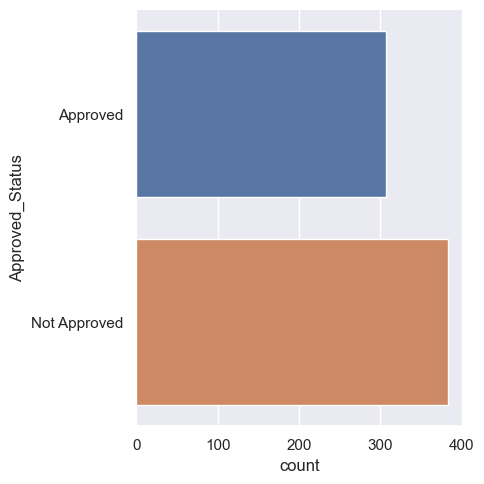

In [308]:
sb.catplot(y="Approved_Status",data=creditcardData,kind="count")

In [309]:
No_notapproved,No_approved=creditcardData["Approved_Status"].value_counts()
print("Ratio of Approved:Not_Approved=",No_approved,":",No_notapproved)
print("Approved percentage: {0:.2f} %".format((No_approved/(No_notapproved+No_approved))*100))

Ratio of Approved:Not_Approved= 307 : 383
Approved percentage: 44.49 %


We see that the percentage of `Approved` credit card is  44.49%, which is slightly less than 50%. Generally it seems that response variable is balanced. Next, we will need to explore the data to identify each variables' relation with `Approved_Status`.

---

### Exploratory Data Analysis

#### Exploring the numerical variables

In [310]:
creditcardData.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


Exploration of variable `Debt`

<Axes: xlabel='Debt', ylabel='Approved_Status'>

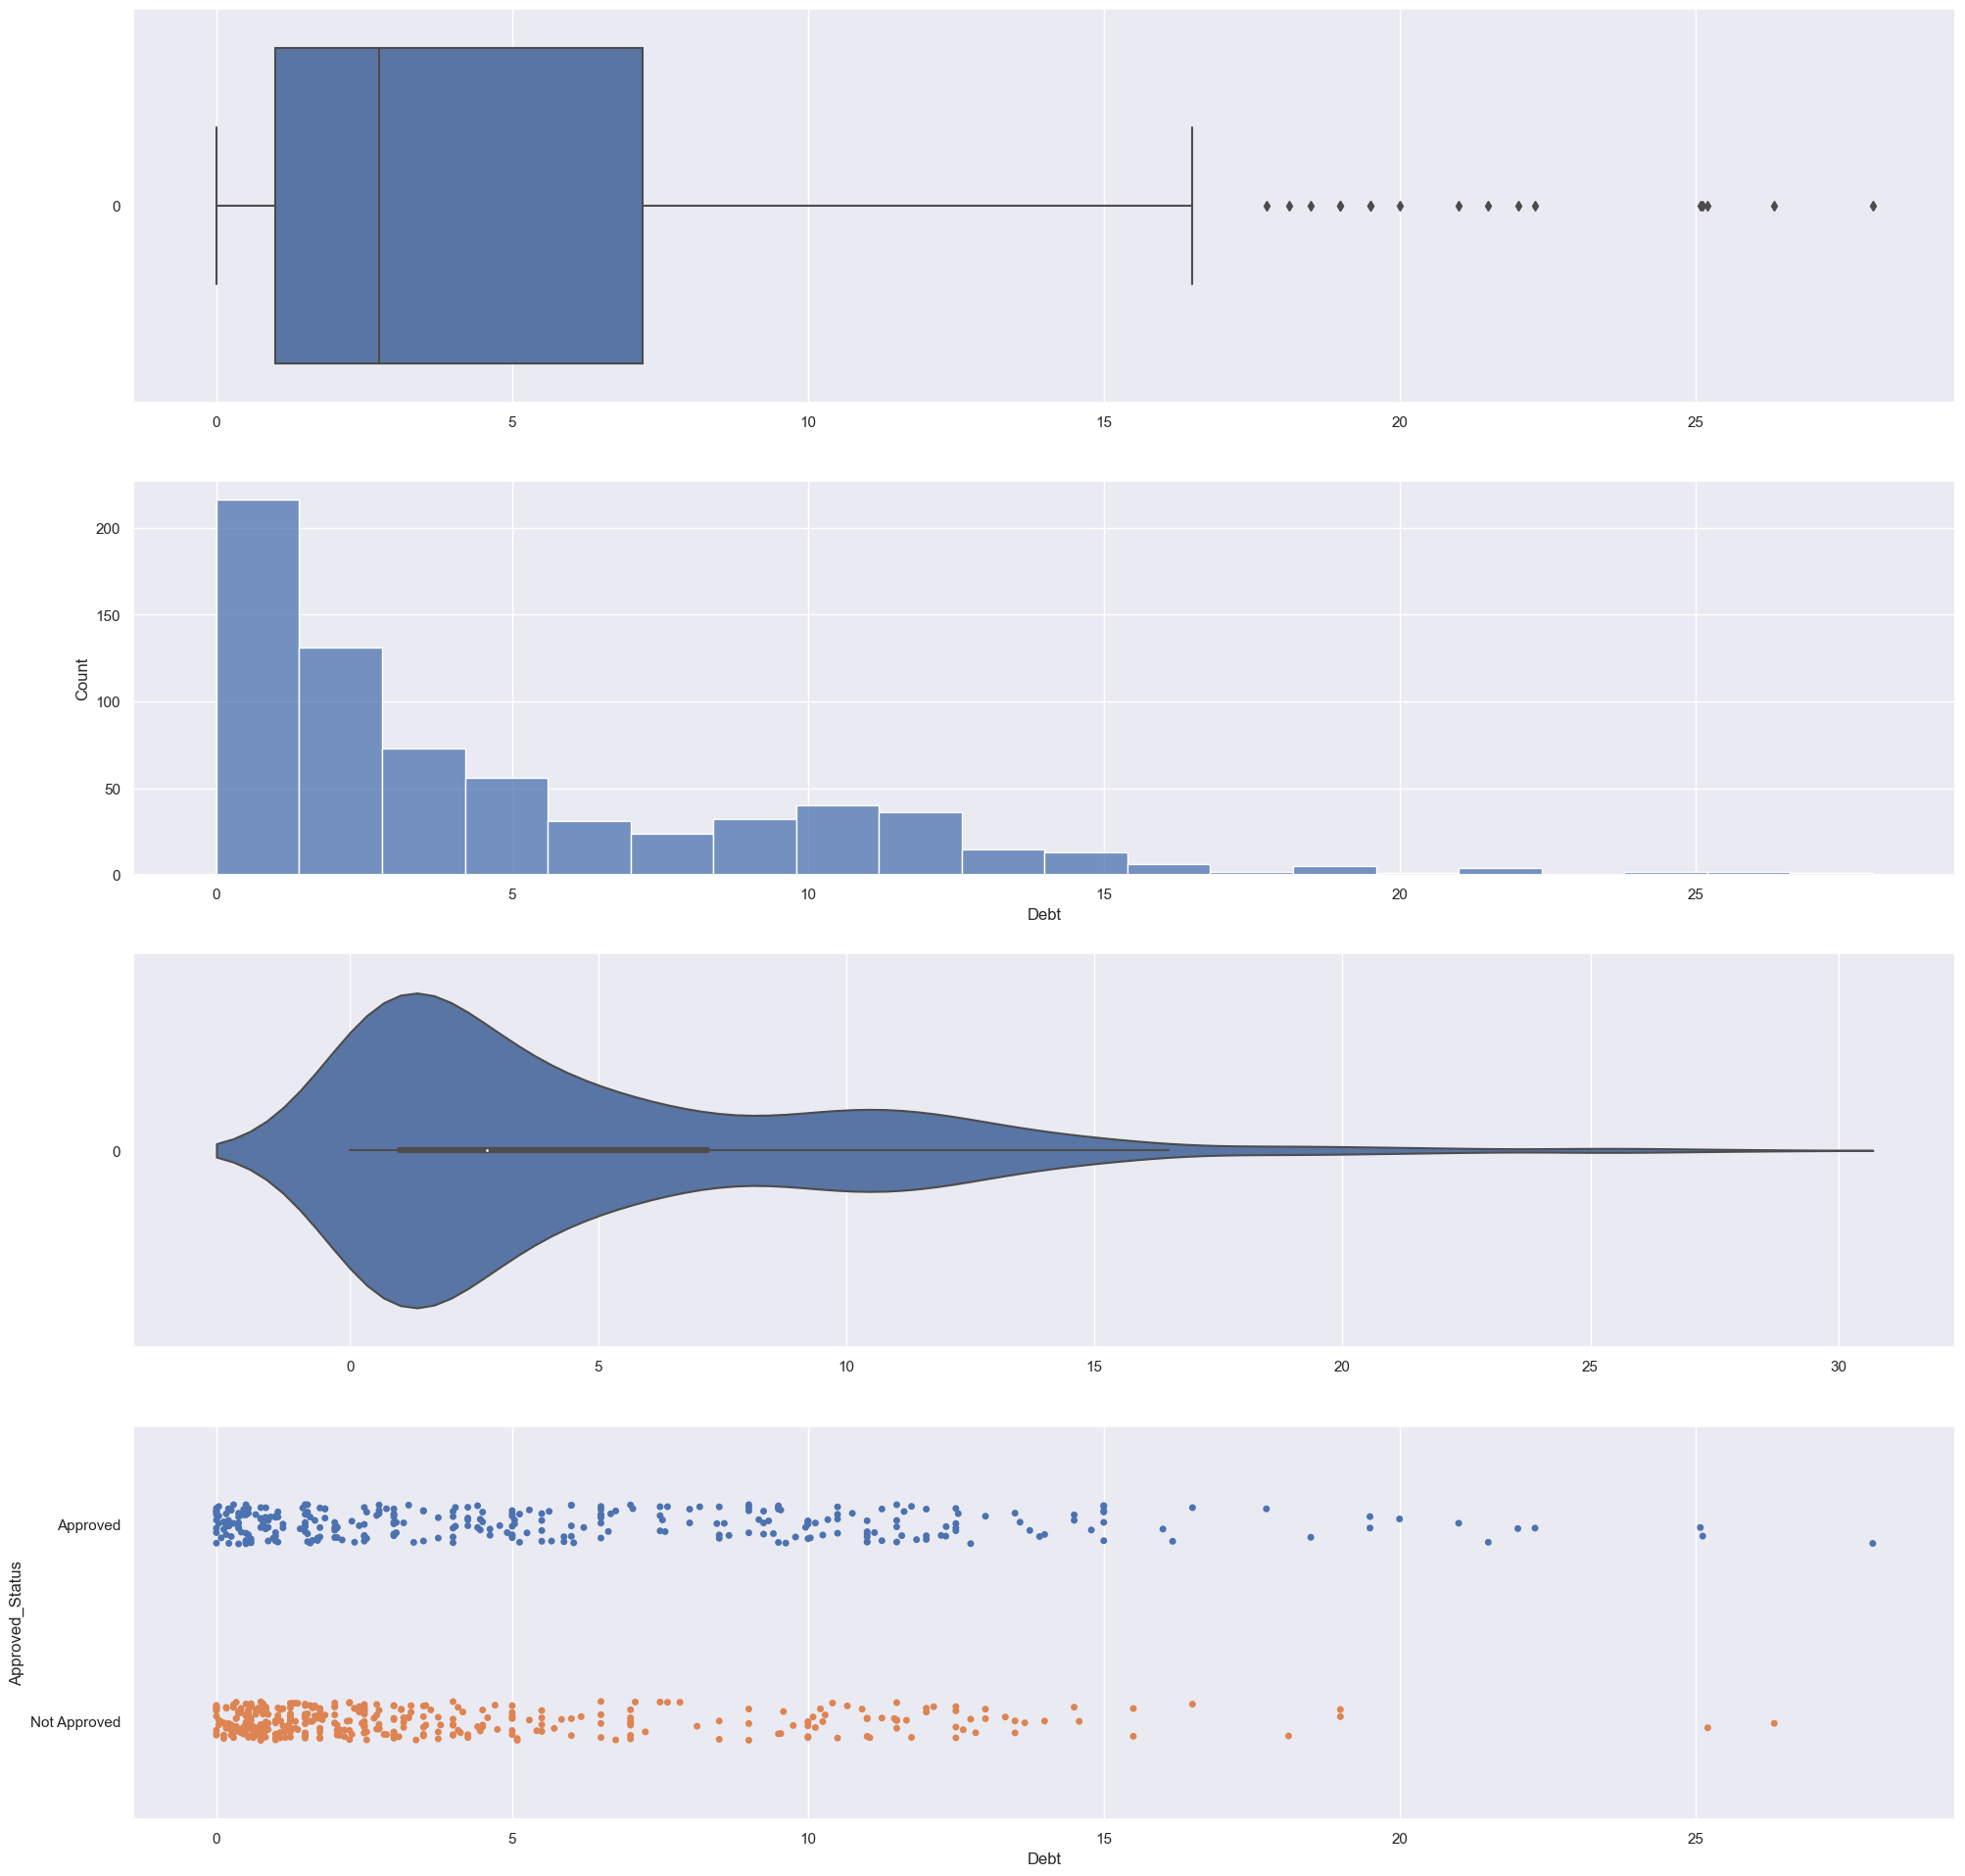

In [311]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Debt'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Debt'], ax = axes[1])
sb.violinplot(data = creditcardData['Debt'], orient = "h", ax = axes[2])
sb.stripplot(x = 'Debt', y = 'Approved_Status', data = creditcardData, ax = axes[3])

While there are less approved applicants with a higher `Debt`, the general trend for both `Approved` and `Not Approved` are similar.
This variable does not seem to have a STRONG relationship with `Approved_Status`.

Exploration of variable `YearsEmployed`

<Axes: xlabel='YearsEmployed', ylabel='Approved_Status'>

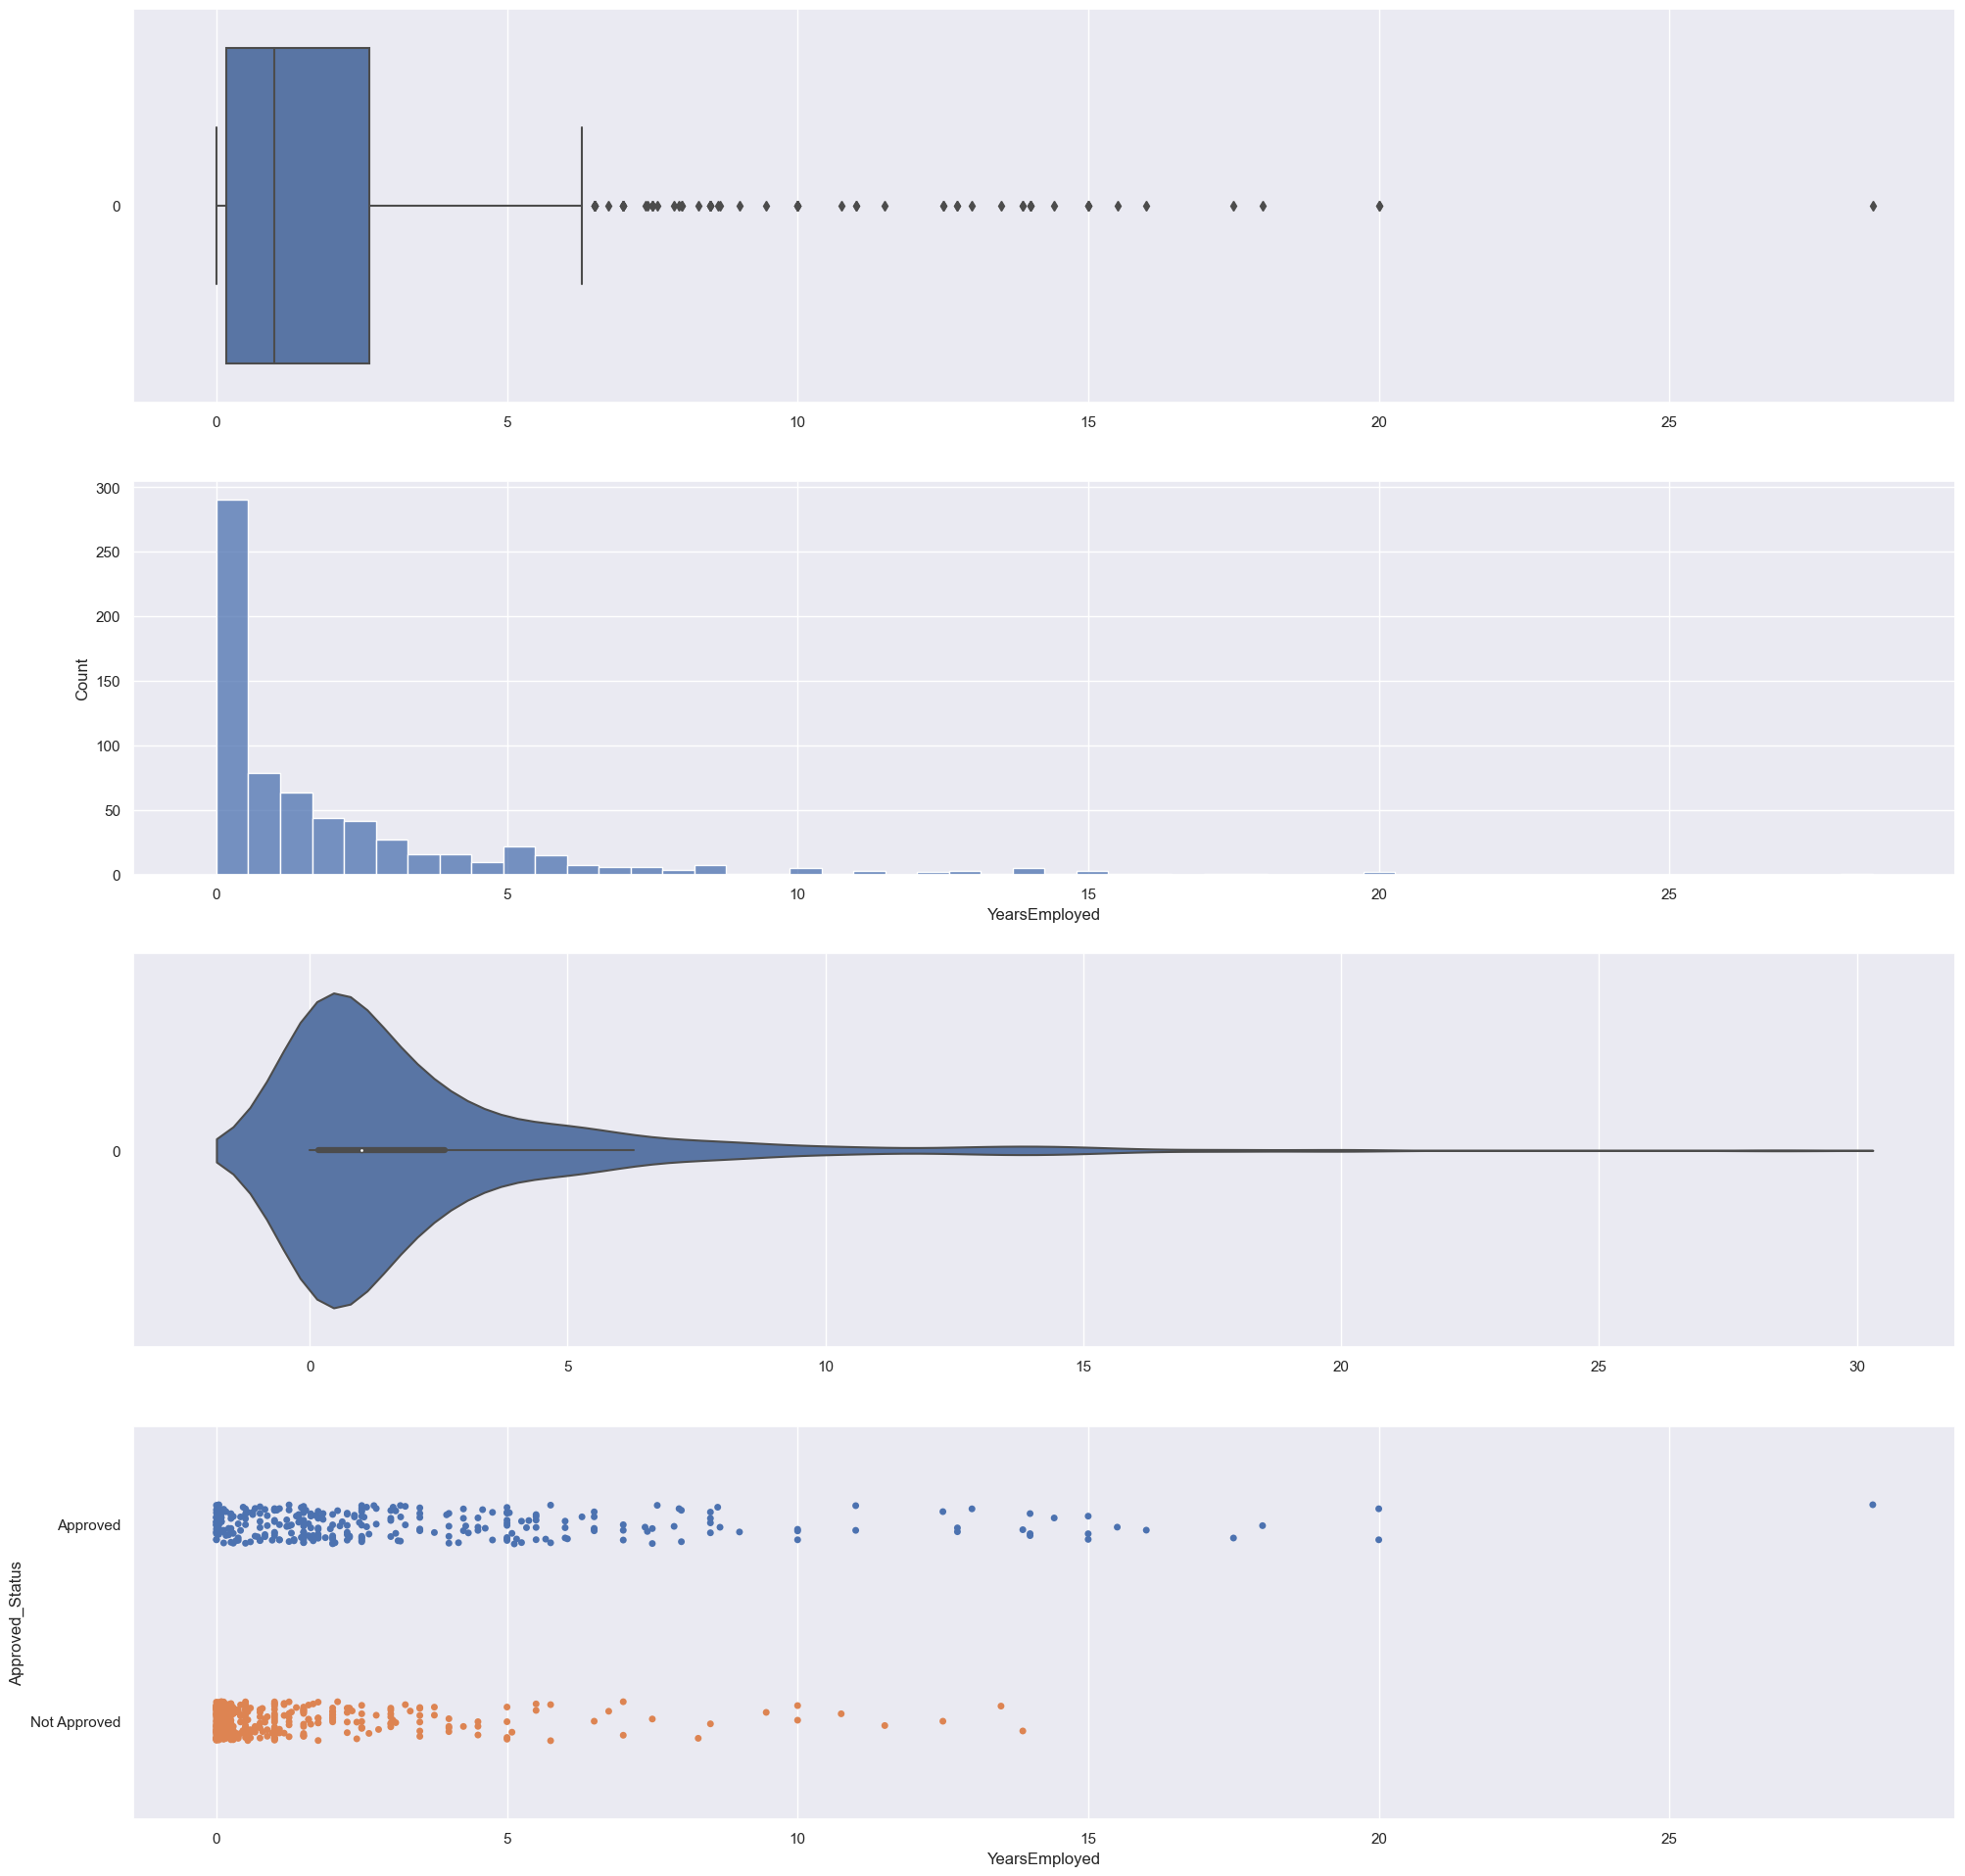

In [312]:
# Plot basic uni-variate figures
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['YearsEmployed'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['YearsEmployed'], ax = axes[1])
sb.violinplot(data = creditcardData['YearsEmployed'], orient = "h", ax = axes[2])
sb.stripplot(x = 'YearsEmployed', y = 'Approved_Status', data = creditcardData, ax = axes[3])

In [313]:
MaxNotApprovedYE = creditcardData[creditcardData['Approved_Status'] == 'Not Approved']['YearsEmployed'].max()
print("The largest YearsEmployed value in Not Approved is:", MaxNotApprovedYE)

The largest YearsEmployed value in Not Approved is: 13.875


There are significantly more approved applicants with a higher `YearsEmployed`. In addition, `Not Approved` applicants only have a maximum of ~14 years of employment, suggesting a strong relationship between `YearsEmployed` and `Approved_Status`.

Exploration of variable `Age`

<Axes: xlabel='Age', ylabel='Approved_Status'>

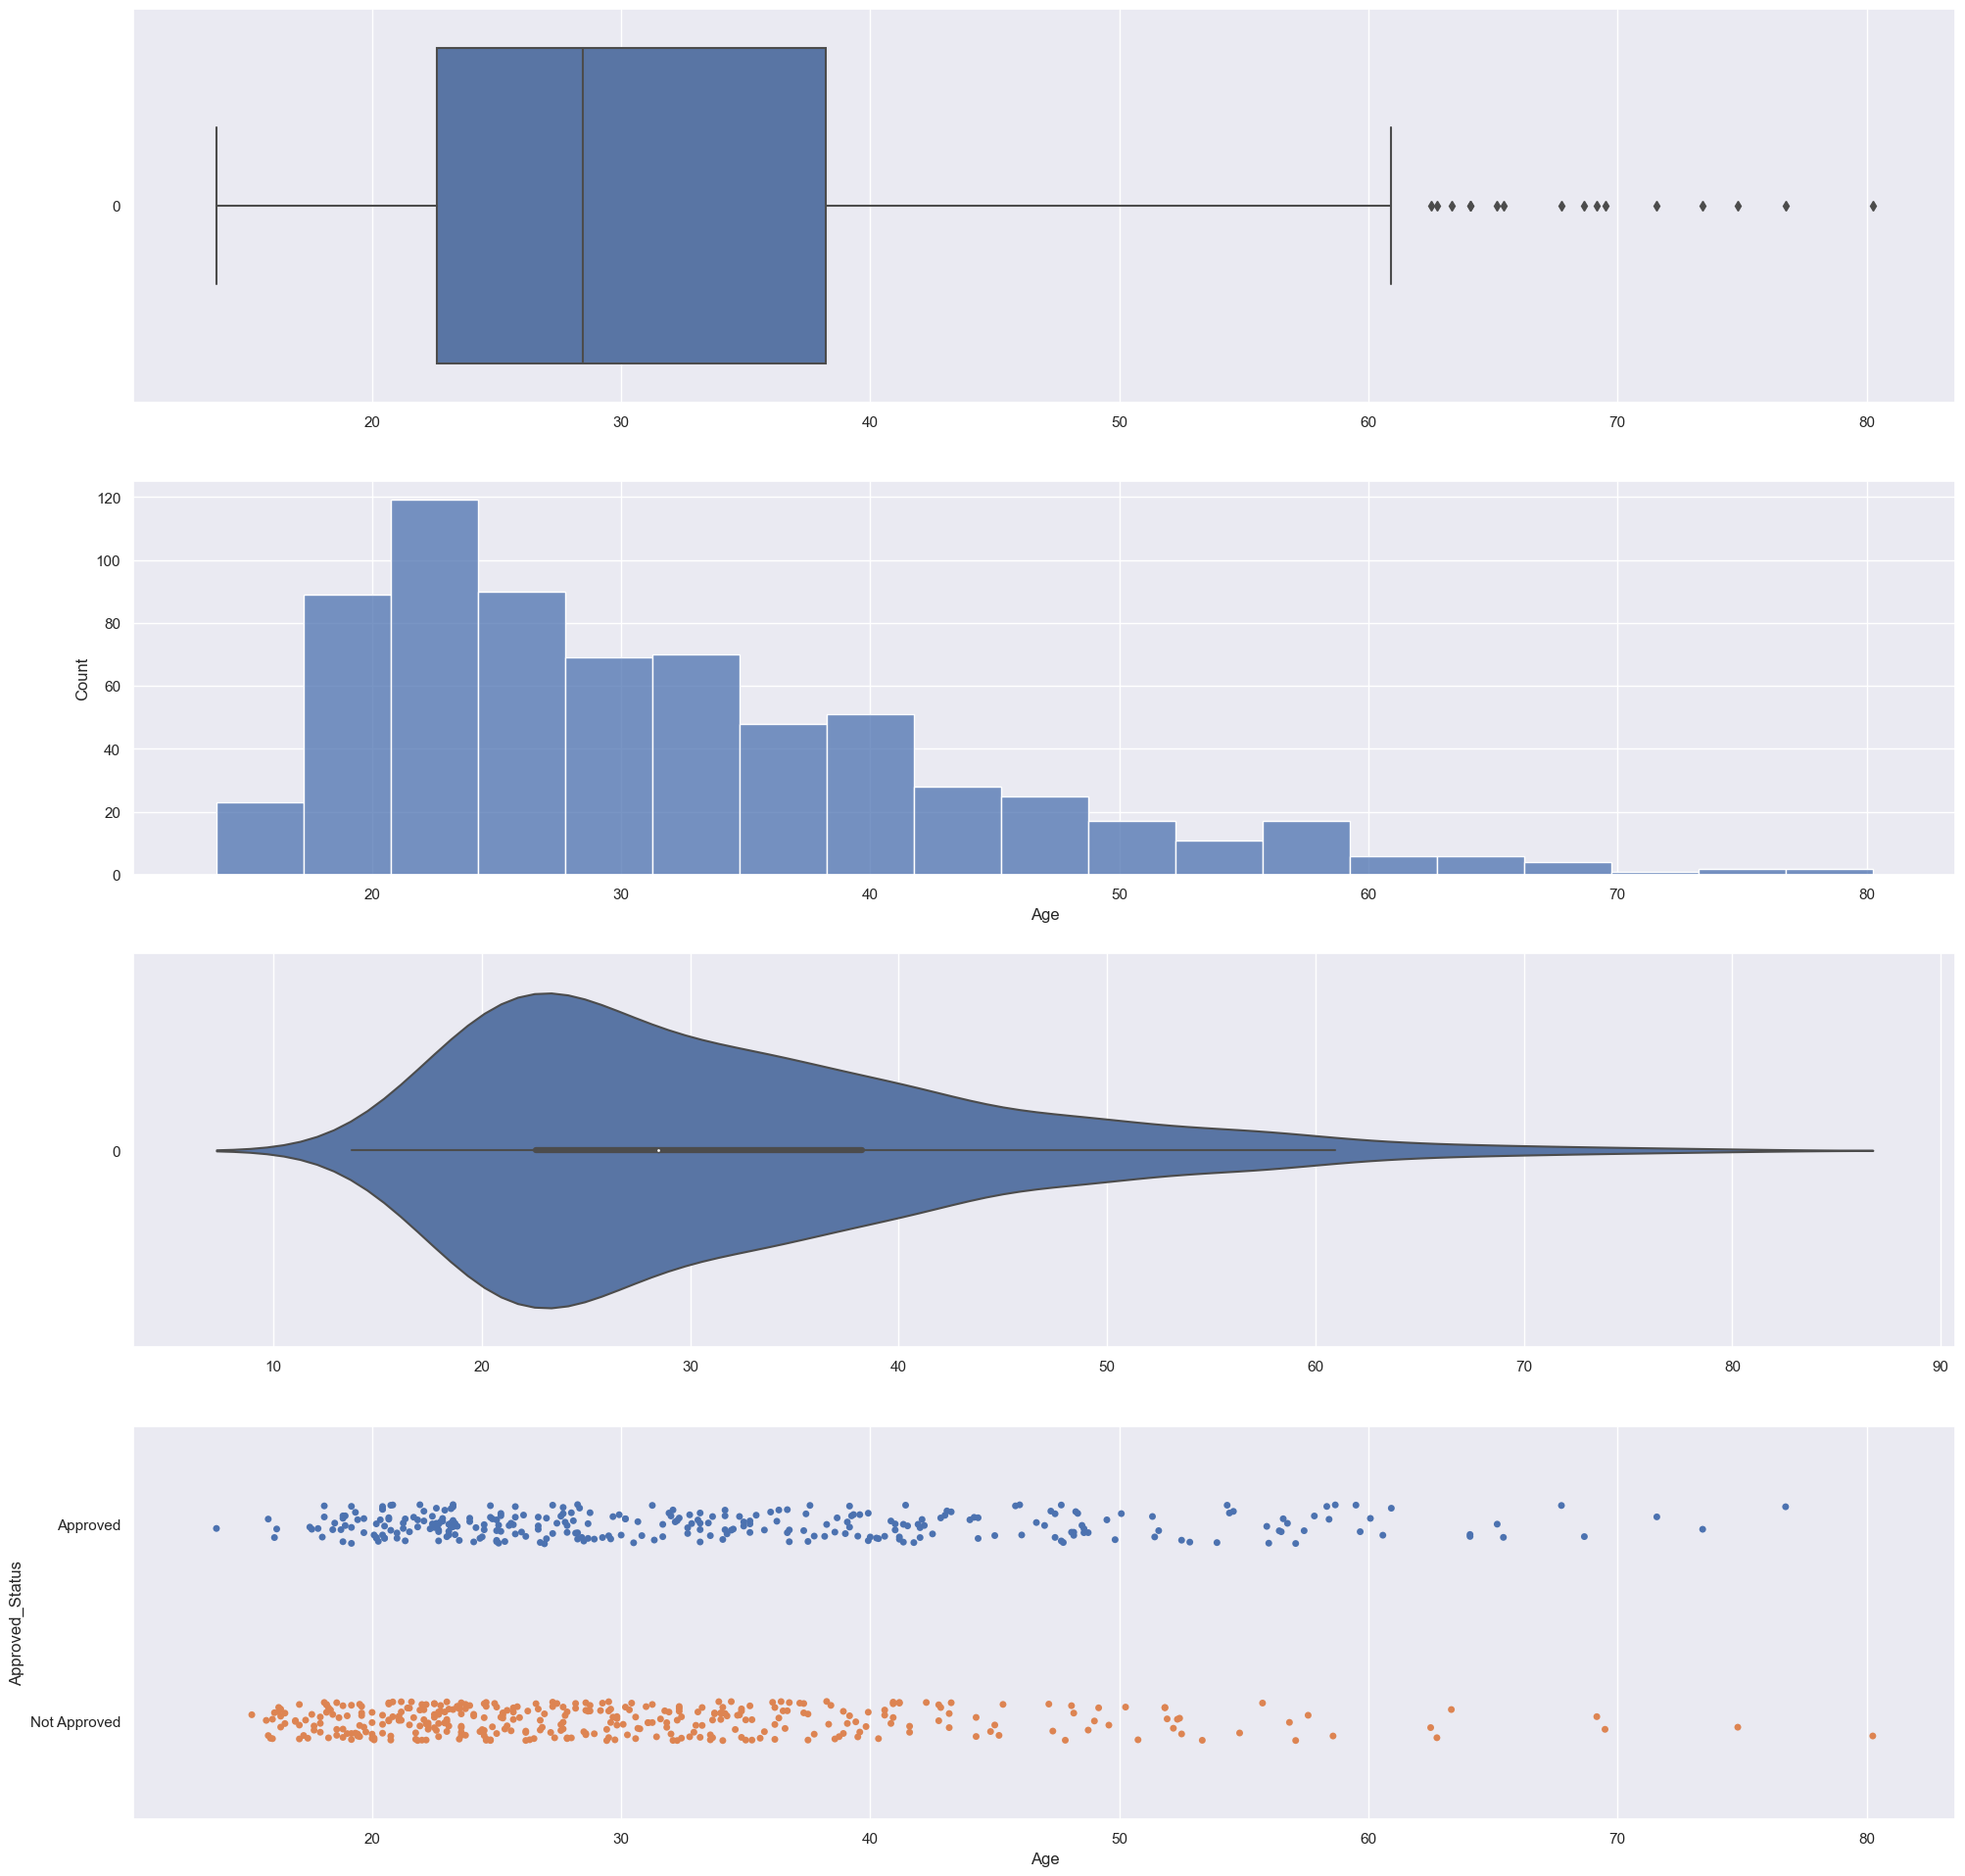

In [314]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Age'], orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Age'], ax = axes[1])
sb.violinplot(data = creditcardData['Age'], orient = "h", ax = axes[2])
sb.stripplot(x = 'Age', y = 'Approved_Status', data = creditcardData, ax = axes[3])

While there are slightly less approved applicants with a higher `Age`, the general trend for both `Approved` and `Not Approved` are similar.
This variable does not seem to have a strong relationship with `Approved_Status`.

Exploration of variable `CreditScore`

<Axes: xlabel='CreditScore', ylabel='Approved_Status'>

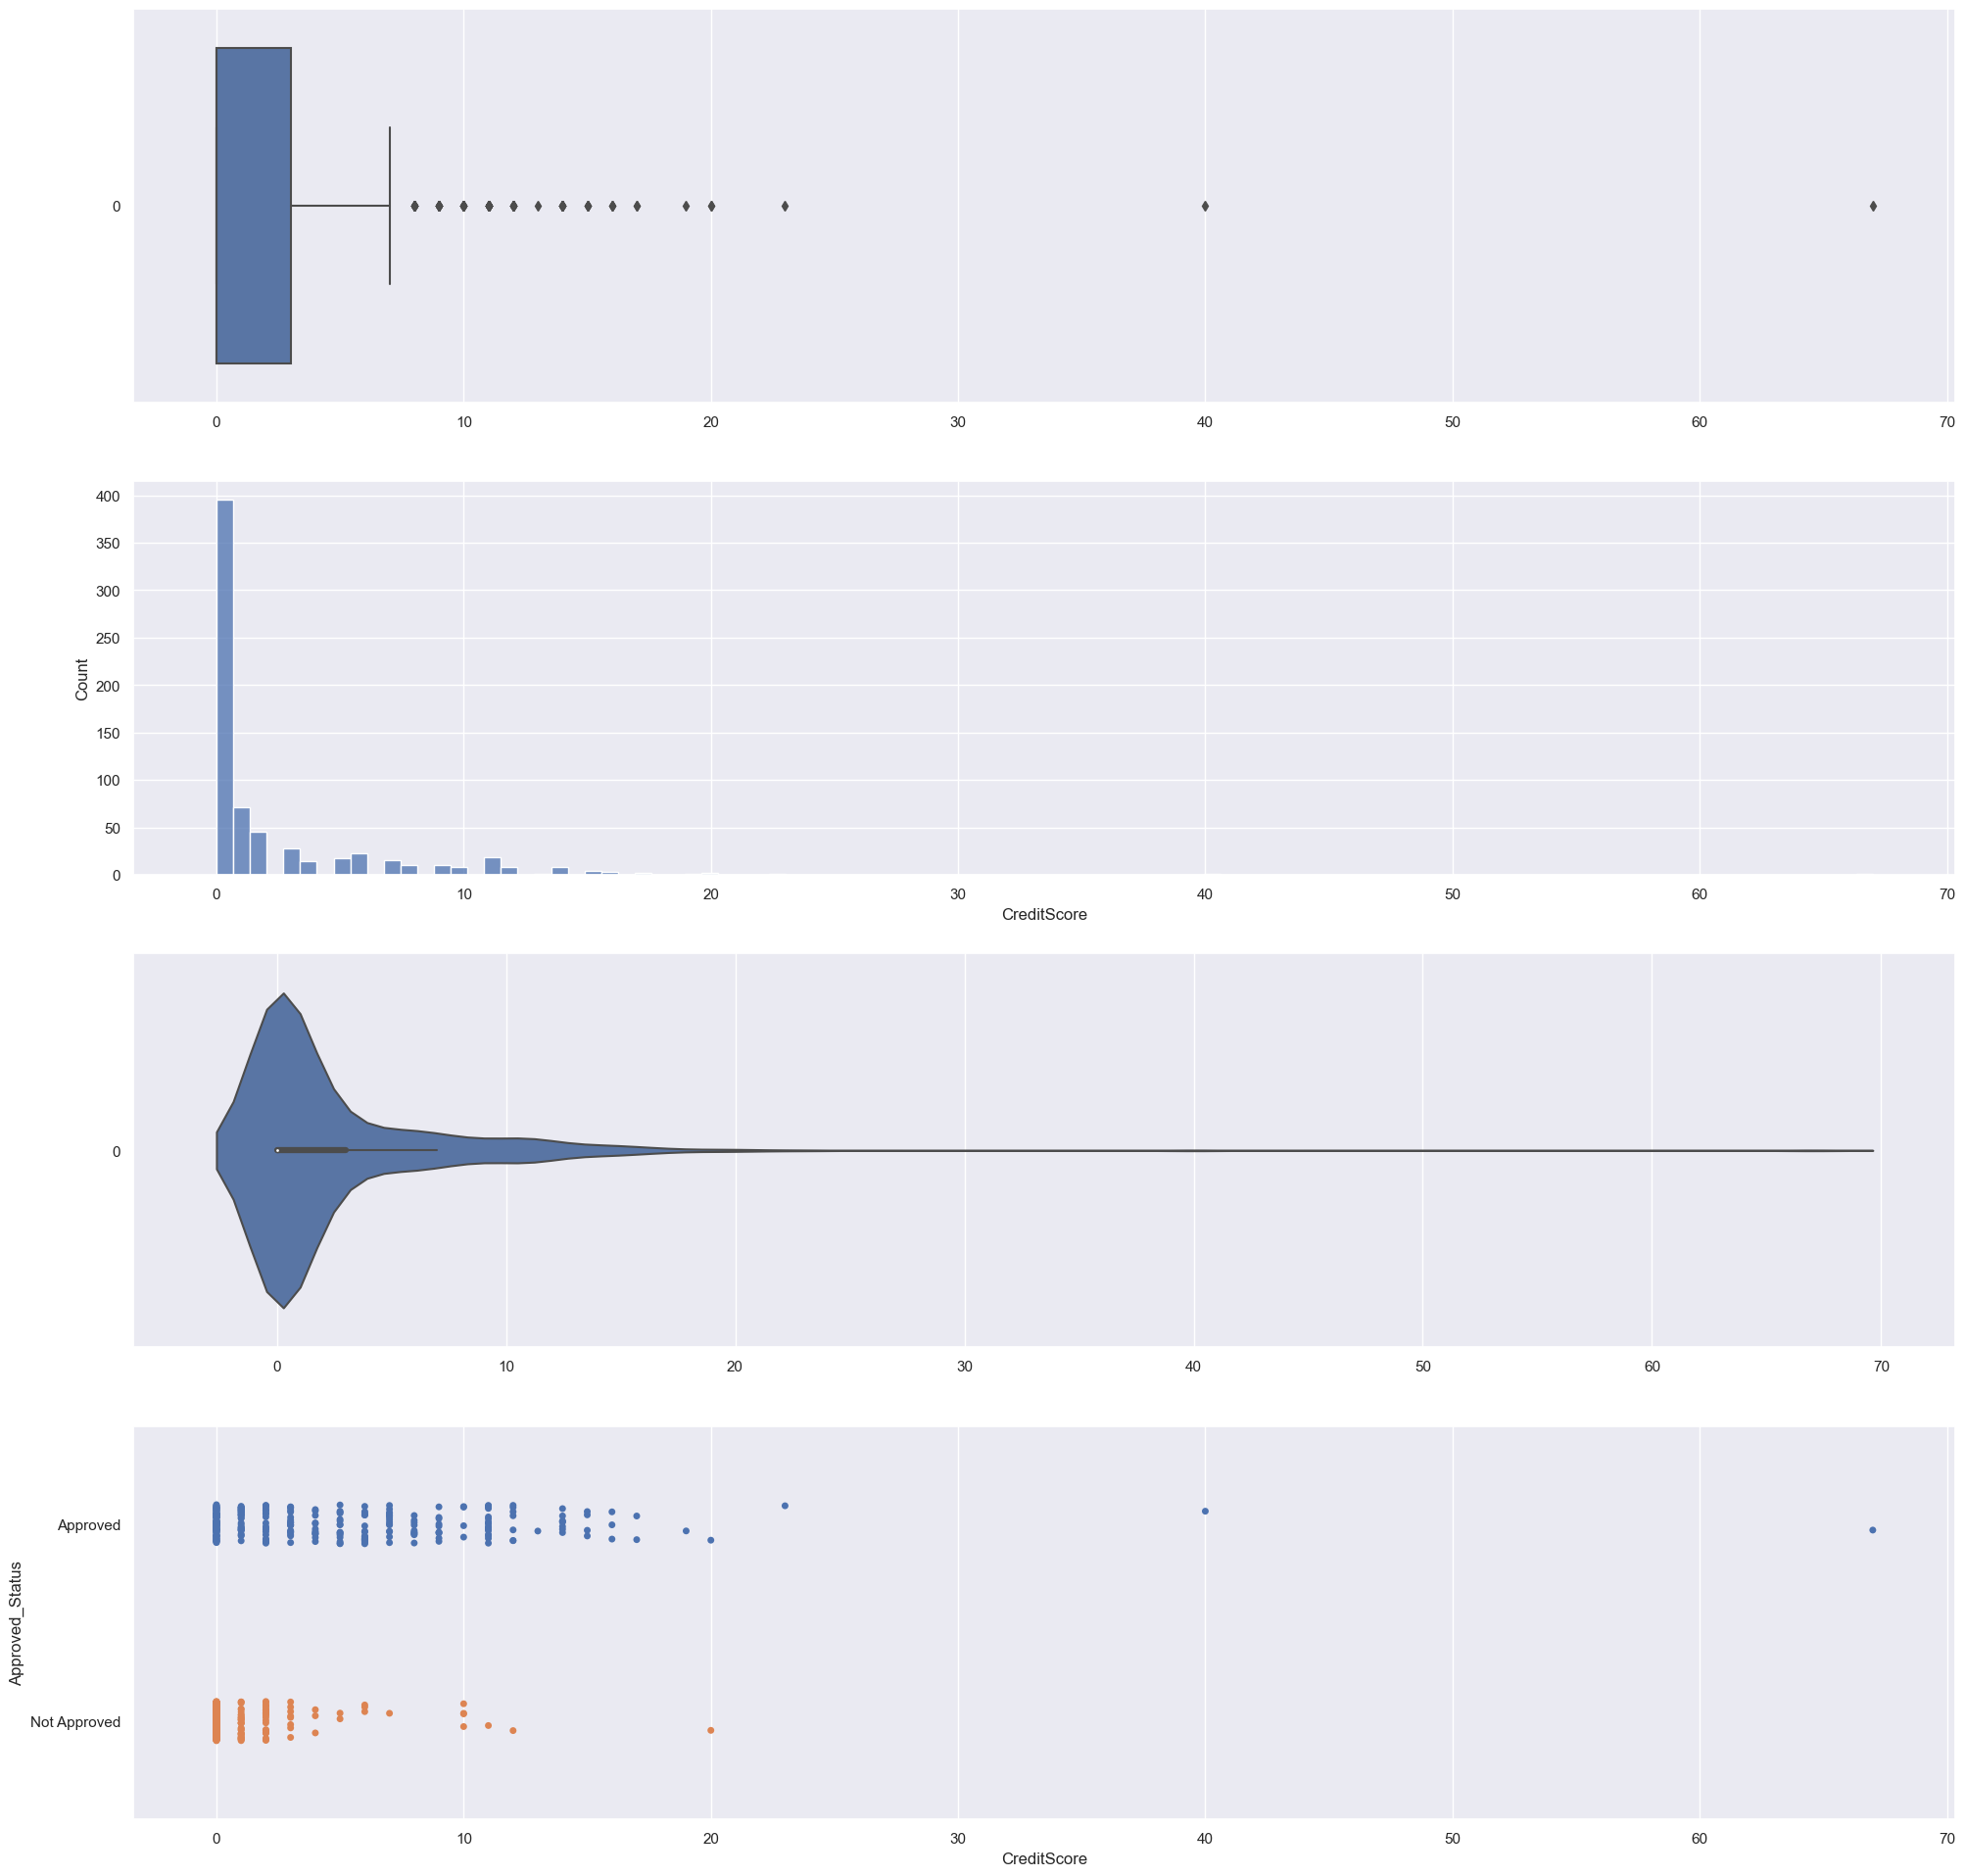

In [315]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['CreditScore'],orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['CreditScore'], ax = axes[1])
sb.violinplot(data = creditcardData['CreditScore'], orient = "h", ax = axes[2])
sb.stripplot(data=creditcardData,x="CreditScore",y="Approved_Status", ax = axes[3])

From the strip plot, it is obvious that there is a strong relationship between `CreditScore` and `Approved_Status`.

<Axes: xlabel='Income', ylabel='Approved_Status'>

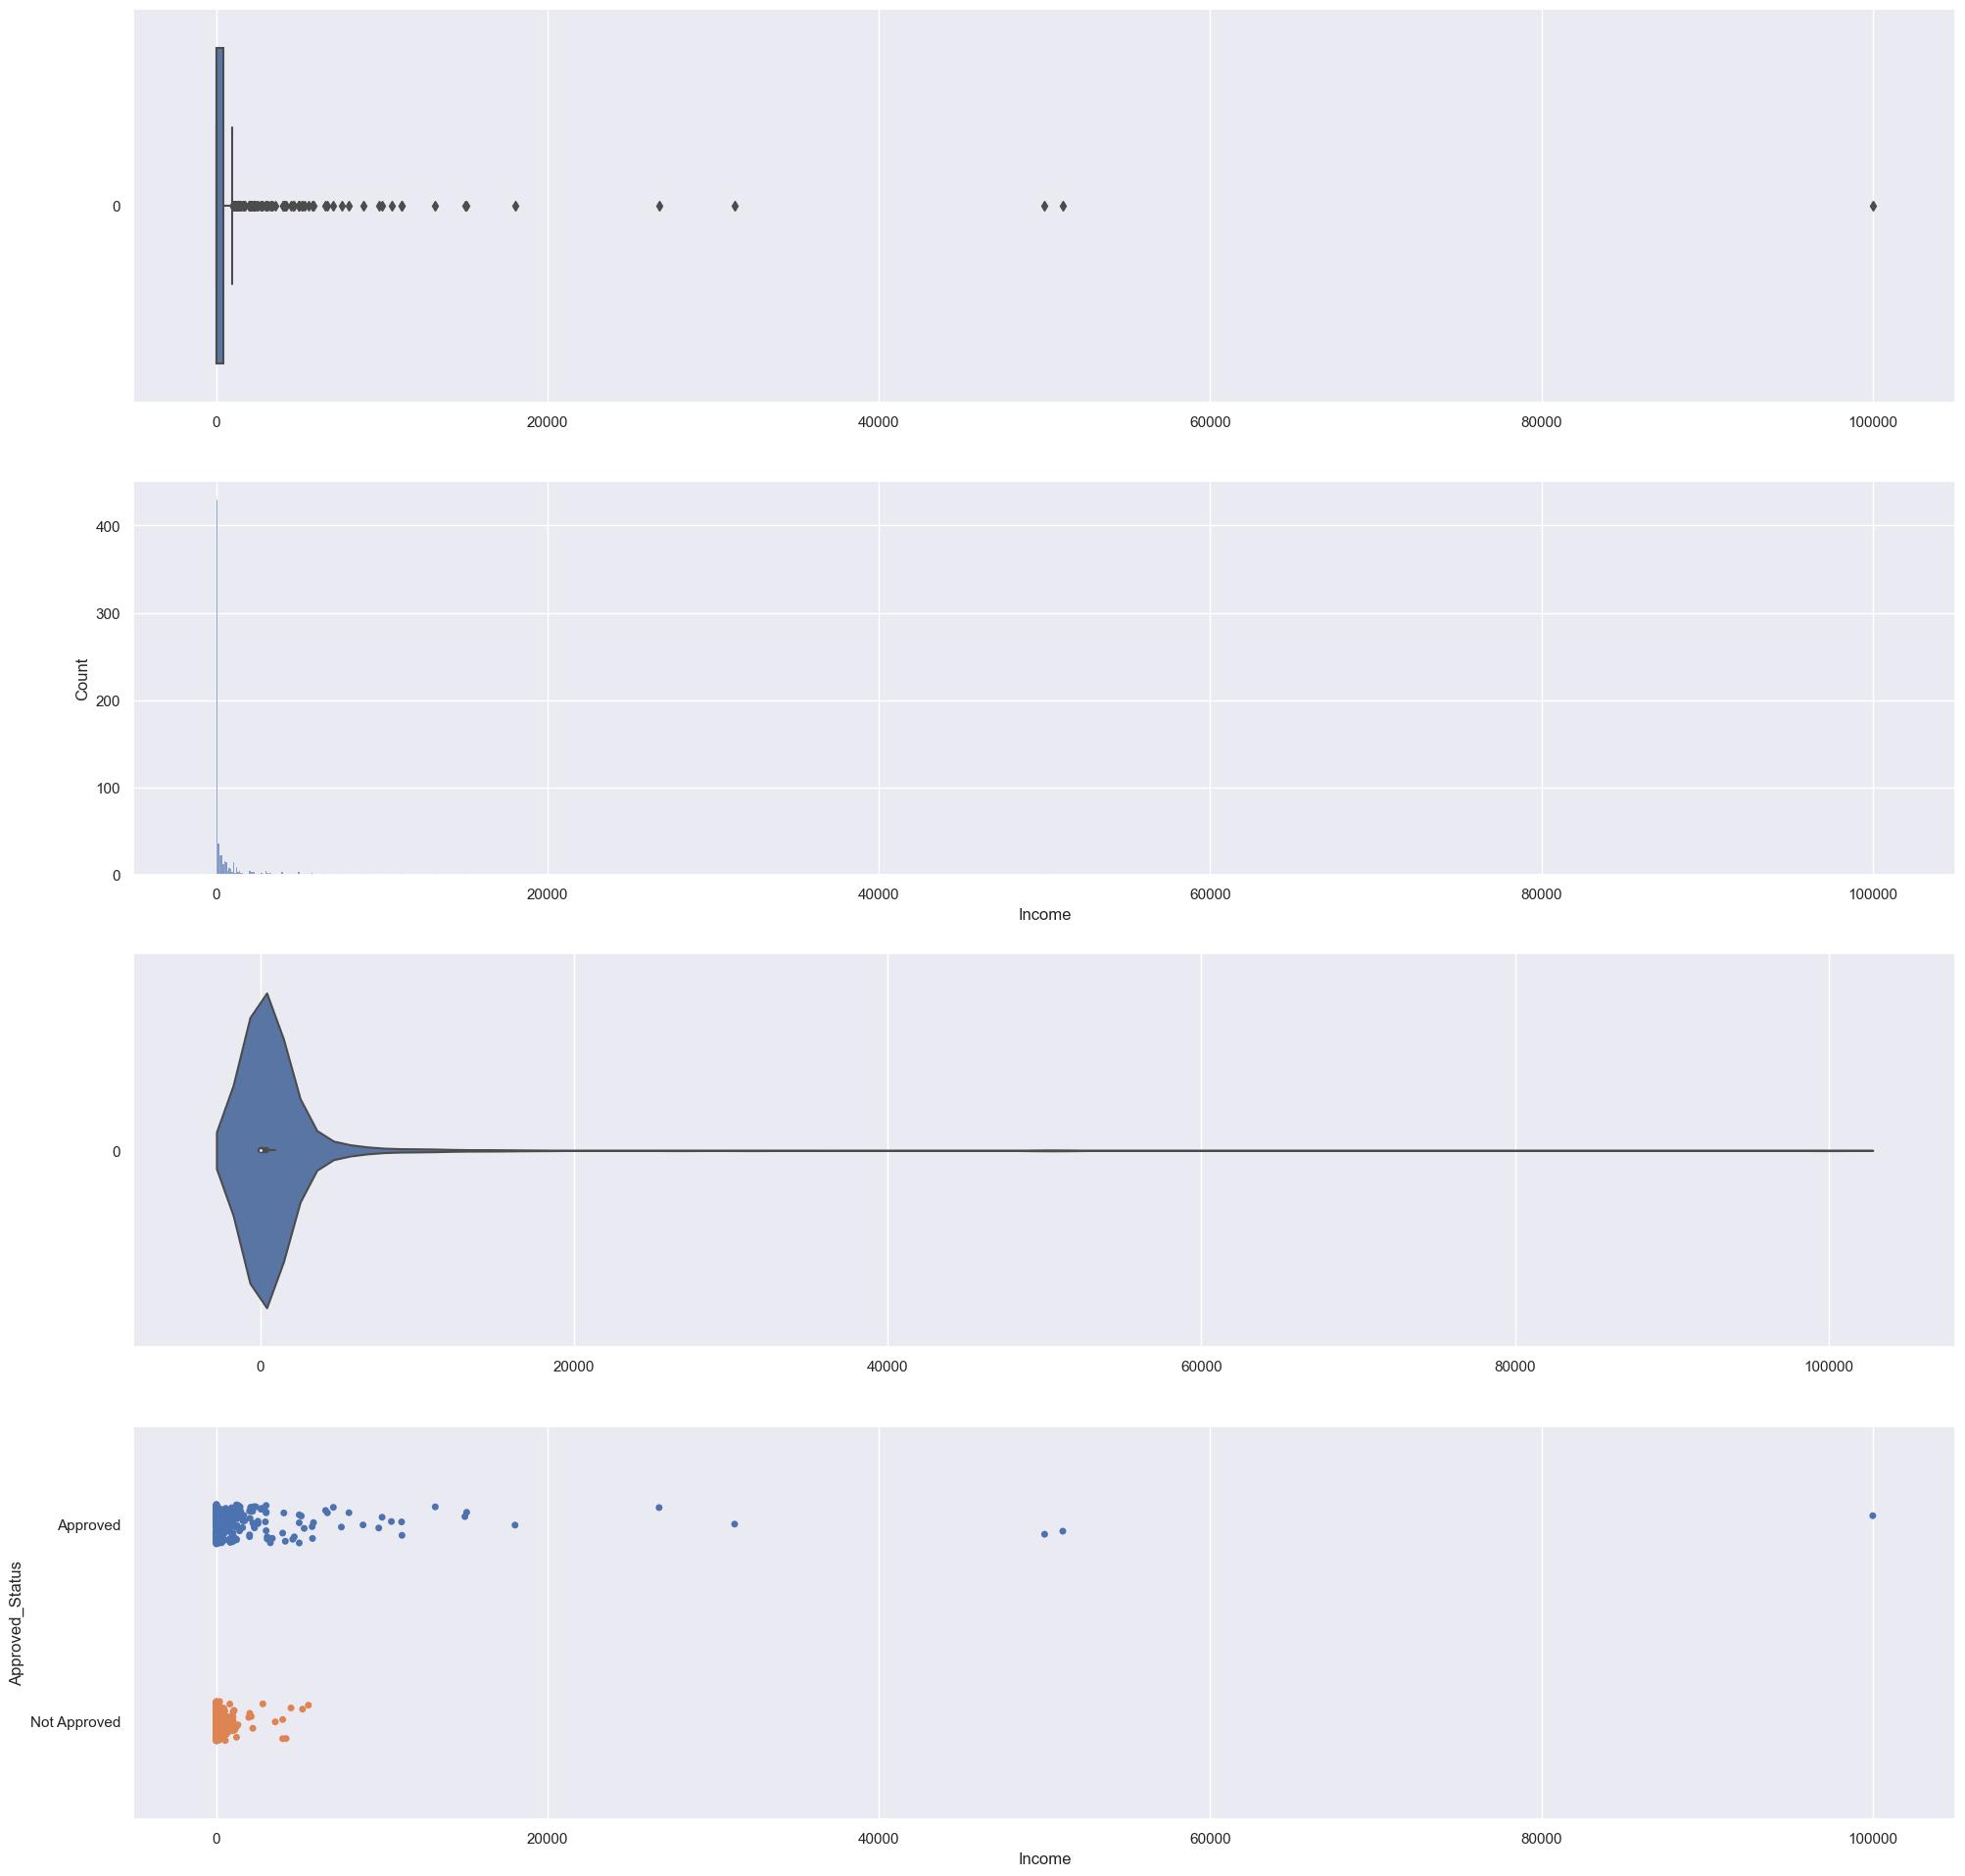

In [316]:
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = creditcardData['Income'],orient = "h", ax = axes[0])
sb.histplot(data = creditcardData['Income'], ax = axes[1])
sb.violinplot(data = creditcardData['Income'], orient = "h", ax = axes[2])
sb.stripplot(data=creditcardData,x="Income",y="Approved_Status", ax = axes[3])

The plots do not scale well with the figsize due to the presence of a strong `Income` outliers. We will re-plot without the outliers just to better identify a trend.

<Axes: xlabel='Income', ylabel='Approved_Status'>

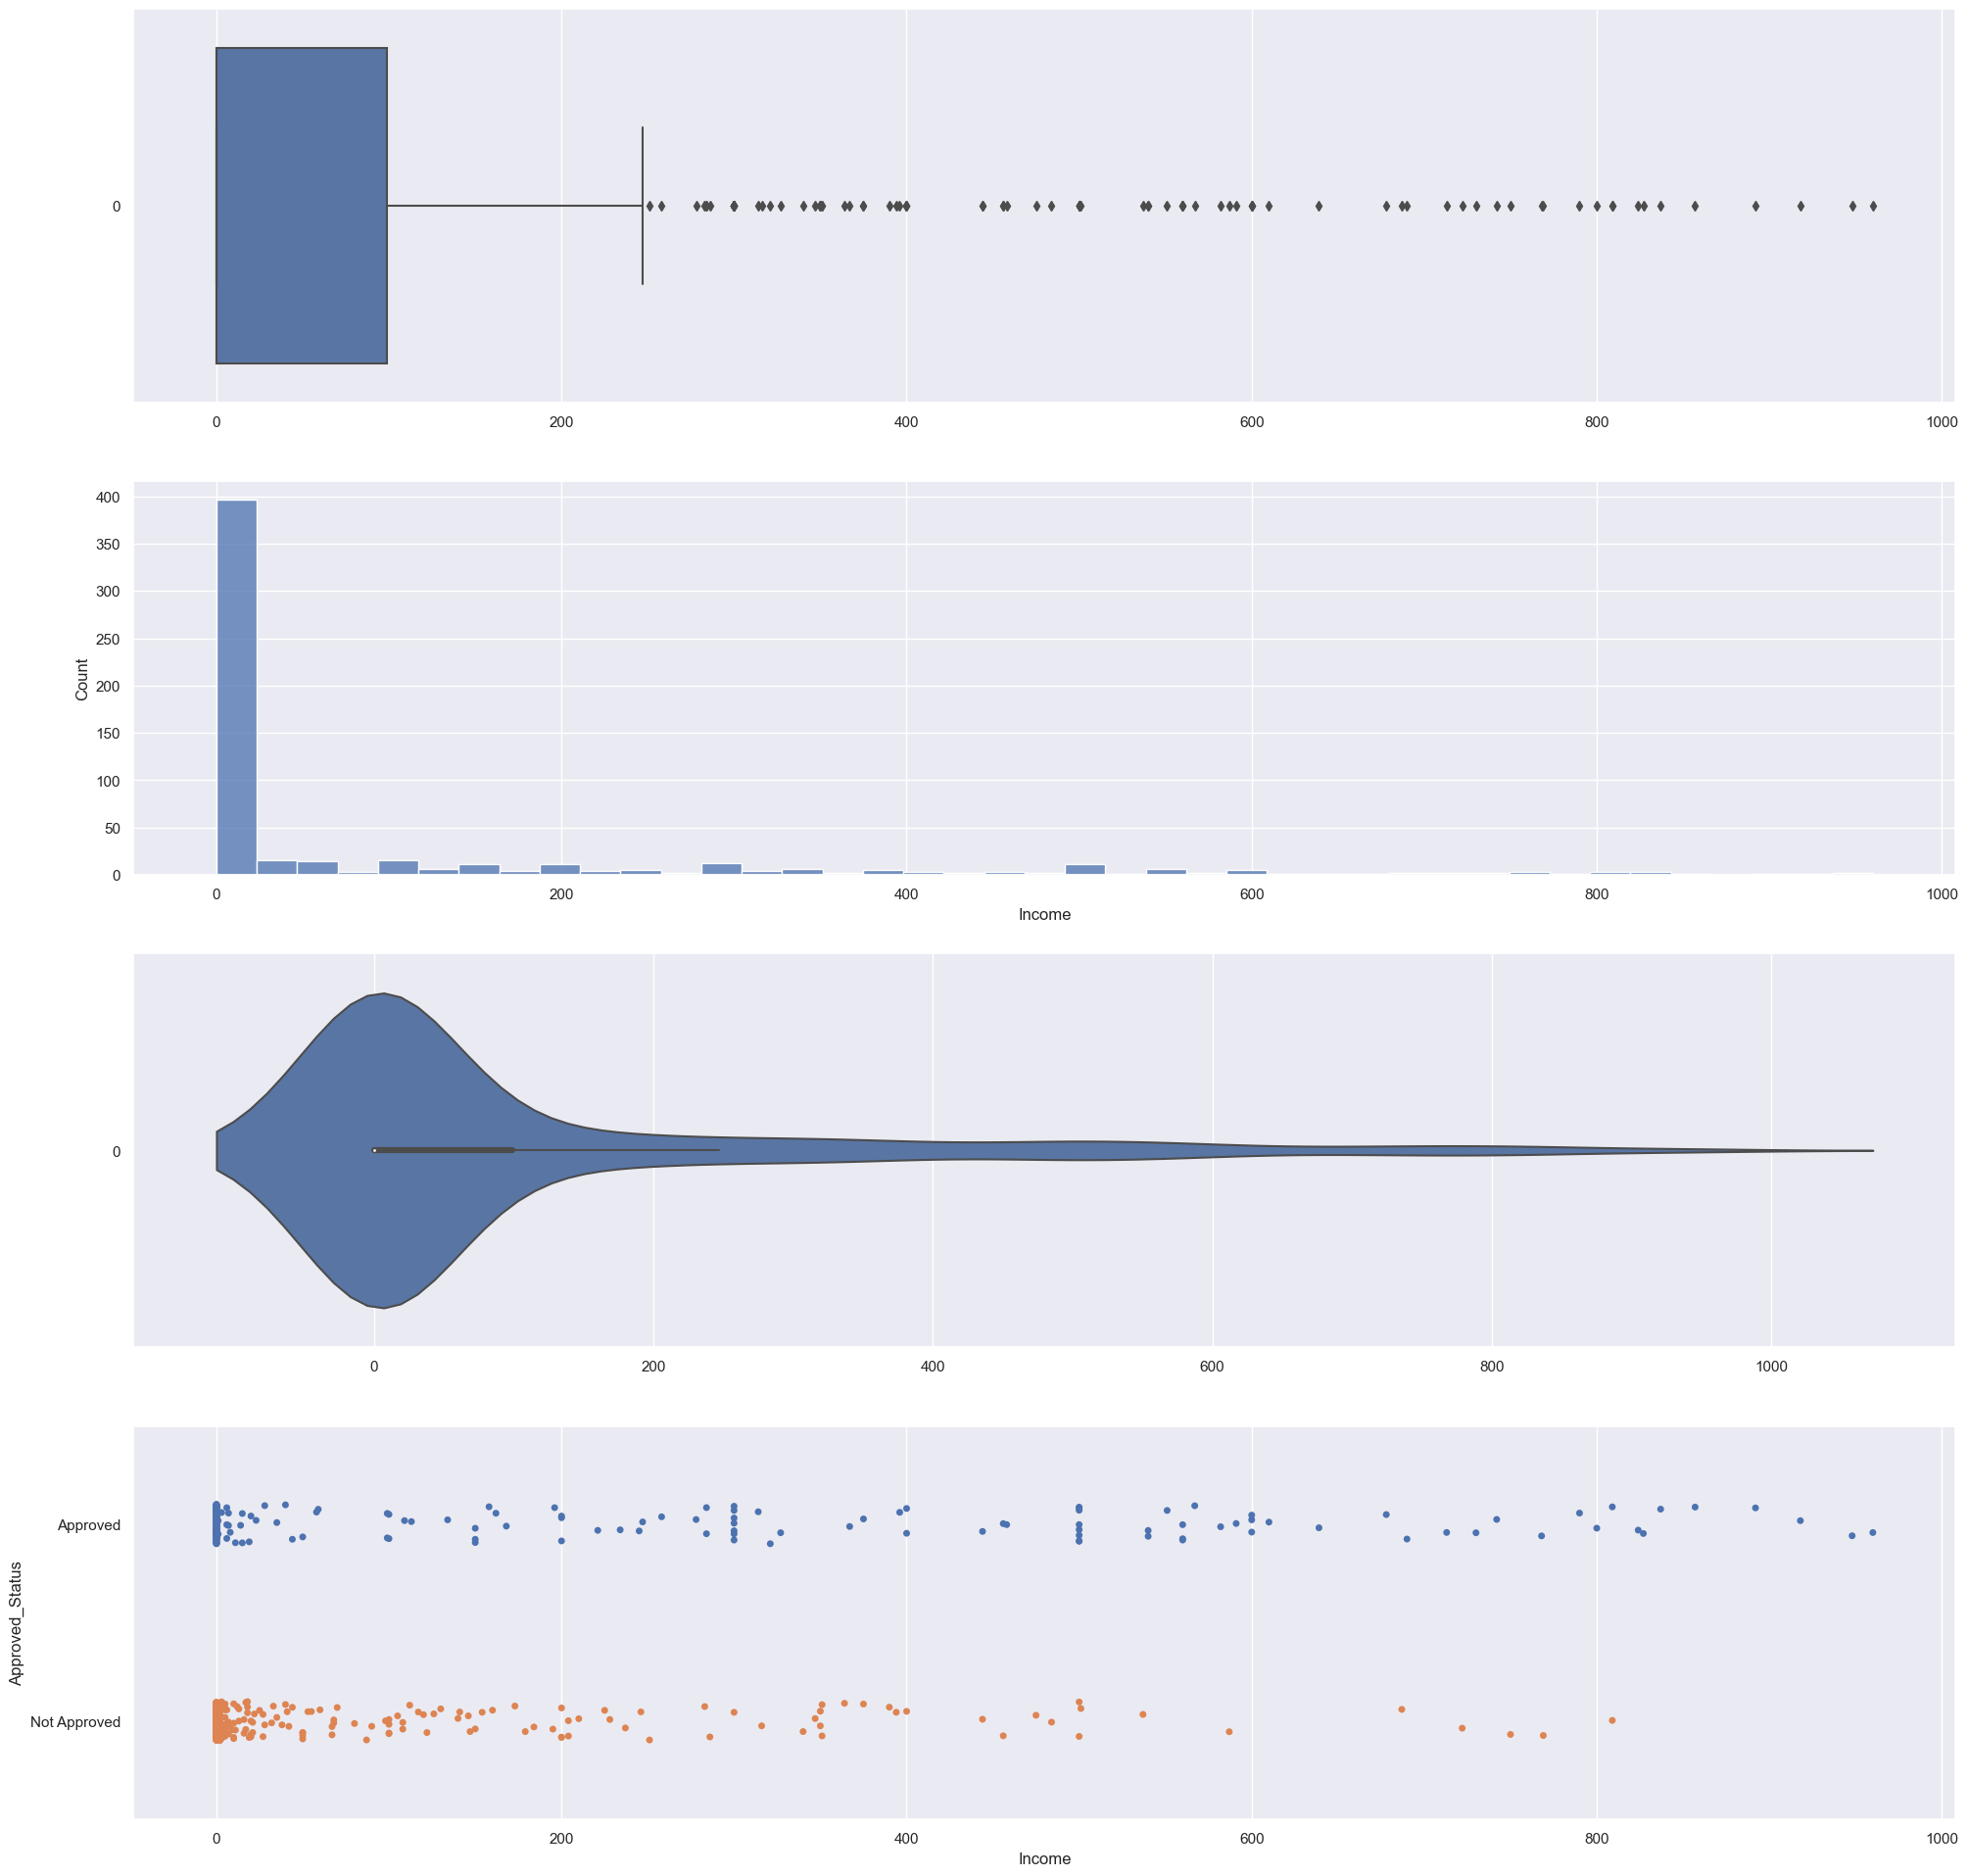

In [317]:
Q1 = creditcardData["Income"].quantile(0.25)
Q3 = creditcardData["Income"].quantile(0.75)
IQR = Q3-Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
IncomeMinusOutlier = creditcardData[(creditcardData["Income"] > lower_bound) & (creditcardData["Income"] < upper_bound)]
f, axes = plt.subplots(4, 1, figsize=(24, 24))
sb.boxplot(data = IncomeMinusOutlier['Income'],orient = "h", ax = axes[0])
sb.histplot(data = IncomeMinusOutlier['Income'], ax = axes[1])
sb.violinplot(data = IncomeMinusOutlier['Income'], orient = "h", ax = axes[2])
sb.stripplot(data=IncomeMinusOutlier,x="Income",y="Approved_Status", ax = axes[3])

There seems to be a strong relationship between `Income` and `Approved_Status` as there are several more `Not Approved` applicants with a lower income.

#### Exploring the categorical variables

In [318]:
creditcardDataStr = creditcardData.loc[:, creditcardData.dtypes == object]
creditcardDataStr.describe()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,Approved_Status
count,678,684,684,681,681,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2,2
top,b,u,g,c,v,t,f,f,g,-,Not Approved
freq,468,519,519,137,399,361,395,374,625,383,383


In [319]:
print("Discovering the values of Married")
creditcardData["Married"].value_counts()

Discovering the values of Married


u    519
y    163
l      2
Name: Married, dtype: int64

In [320]:
print("Discovering the values of Citizen")
creditcardData["Citizen"].value_counts()

Discovering the values of Citizen


g    625
s     57
p      8
Name: Citizen, dtype: int64

In [321]:
print("Discovering the values of EducationLevel")
creditcardData["EducationLevel"].value_counts()

Discovering the values of EducationLevel


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

In [322]:
print("Discovering the values of Ethnicity")
creditcardData["Ethnicity"].value_counts()

Discovering the values of Ethnicity


v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

Variables `EducationLevel` and `Ethnicity` have too many ambiguous values. After checking the source of the dataset, we discovered that most applicants do not want to disclose these sensitive information. Therefore, we will drop this variables out of our predictors.

In [323]:
todrop=["EducationLevel","Ethnicity"]
ccData=creditcardData.drop(columns=todrop)
ccData.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,1.71,t,f,0,f,s,120.0,0,+,Approved


Relationship between Gender and Approval Status

<Axes: xlabel='Approved_Status', ylabel='Gender'>

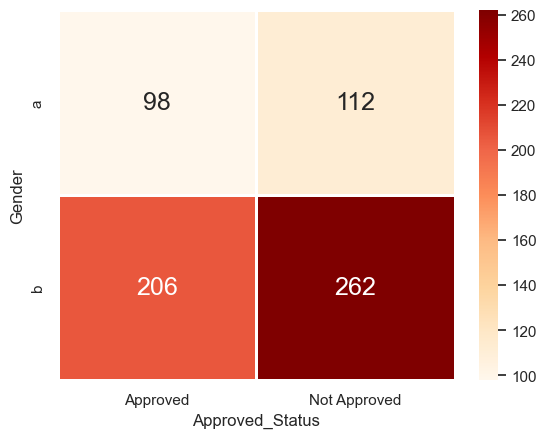

In [324]:
sb.heatmap(ccData.groupby(['Gender','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

It does not seem that `Gender` strongly affects `Approved_Status` as the values are somewhat balanced for both `Approved` and `Not Approved`.

Relationship between Married and Approval Status

<Axes: xlabel='Approved_Status', ylabel='Married'>

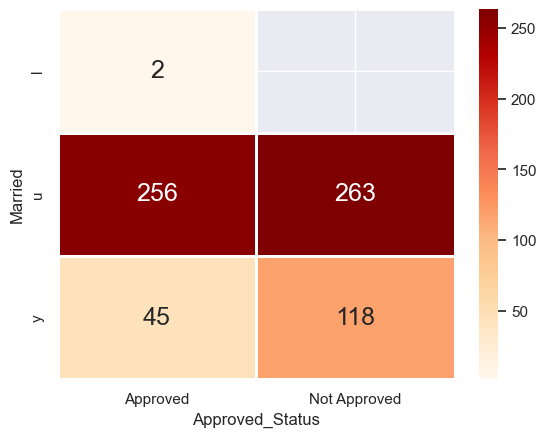

In [325]:
sb.heatmap(creditcardDataStr.groupby(['Married','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

From the heatmap, while there are more `y` applicants who were not approved, the `u` applicants see a good balance. With further consideration, we deemed that `Married` should not strongly affect `Approved_Status`.

Relationship between Drivers License and Approval Status

<Axes: xlabel='Approved_Status', ylabel='DriversLicense'>

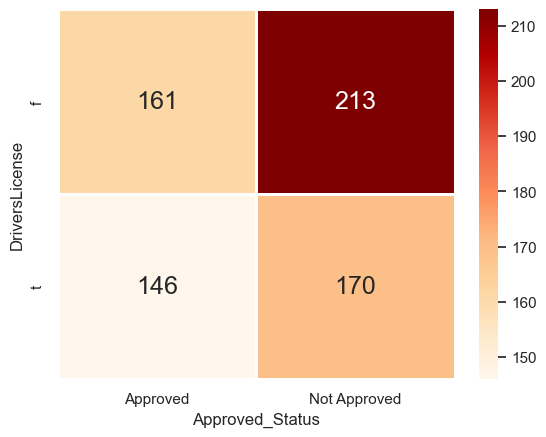

In [326]:
sb.heatmap(creditcardDataStr.groupby(['DriversLicense','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

It does not seem that `DriversLicense` strongly affects `Approved_Status` as the values are somewhat balanced for both `Approved` and `Not Approved`.

Relationship between Citizen and Approval Status

<Axes: xlabel='Approved_Status', ylabel='Citizen'>

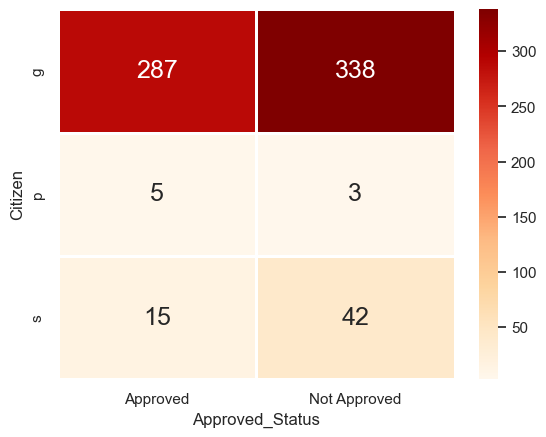

In [327]:
sb.heatmap(creditcardDataStr.groupby(['Citizen','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

It does not seem that `Citizen` strongly affects `Approved_Status` as the values are somewhat balanced for both `Approved` and `Not Approved`.

Relationship between PriorDefault and Approval Status

<Axes: xlabel='Approved_Status', ylabel='PriorDefault'>

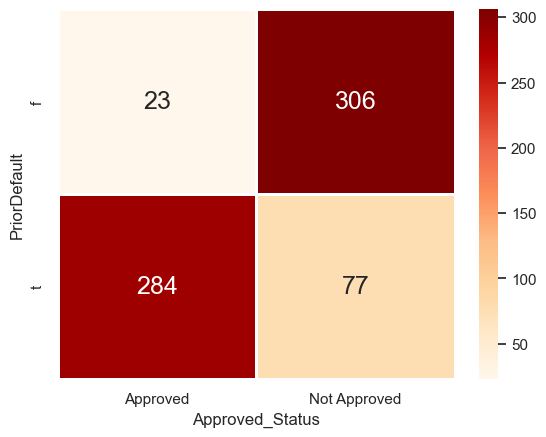

In [328]:
sb.heatmap(ccData.groupby(['PriorDefault','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

It is obvious that there is a very strong relationship with `PriorDefault` and `Approved_Status`, this variable should definitely be considered for model training.

Relationship between Employed and Approval Status

<Axes: xlabel='Approved_Status', ylabel='Employed'>

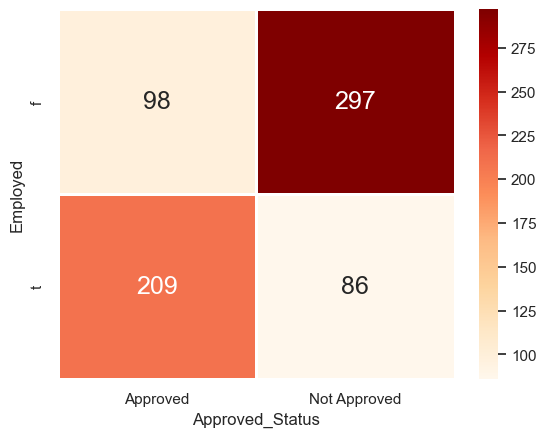

In [329]:
sb.heatmap(ccData.groupby(['Employed','Approved_Status']).size().unstack(),
    linewidths = 1, annot = True, fmt = 'g', annot_kws = {'size':18}, cmap = 'OrRd')

Similarly, there is also a very strong relationship with `Employed` and `Approved_Status`, this variable should also be considered for model training.

---

### Applying Machine Learning Techniques to predict `Approved_Status`

We have defined some helper functions that we will use later on

Train test split

In [330]:
def train_test_split_func(X,y,test_size): # This function retunrs X_train,X_test,y_train,y_test as a list

    data = list(train_test_split(X,y,test_size=test_size))
    print(f'X_train: {data[0].shape}')
    print(f'X_test: {data[1].shape}')
    print(f'y_train: {data[2].shape}')
    print(f'y_test: {data[3].shape}')

    return data 

Random Forest

In [331]:
def randomforest( rforest, X_train,X_test, y_train,y_test):    
    rforest.fit(X_train,y_train.Approved_Status.ravel())
    y_train_pred = rforest.predict(X_train)    
    y_test_pred = rforest.predict(X_test)
    print("Train Data")
    print("Accuracy  :\t", rforest.score(X_train, y_train))    
    print()
    print("Test Data")
    print("Accuracy  :\t", rforest.score(X_test, y_test))    
    print()
    return y_train_pred,y_test_pred

Logisitic Regression

In [332]:
def logistic_regression(model,X_train,X_test,y_train,y_test):  # This function returns the y_train_predict and the y_test_predict
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    accuracy_train = model.score(X_train,y_train)
    accuracy_test = accuracy_score(y_test,y_test_pred)

    print(f'Train Accuracy: {accuracy_train}')
    print(f" Test Accuracy: {accuracy_test}")
    return y_train_pred,y_test_pred 

Evaluation Function (Confusion Matrix with F-Score metric)

In [333]:
def confusion_matrix_func(y_test,y_test_pred,type):

    sb.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt=".0f", annot_kws={"size": 18})

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives 
    fpTest = cmTest[0][1] # False Positives 
    tnTest = cmTest[0][0] # True Negatives 
    fnTest = cmTest[1][0] # False Negatives 

    print(f"TPR {type} :\t", (tpTest/(tpTest + fnTest)))
    print(f"TNR {type} :\t", (tnTest/(tnTest + fpTest)))
    print()

    print(f"FPR {type} :\t", (fpTest/(fpTest + tnTest)))
    print(f"FNR {type} :\t", (fnTest/(fnTest + tpTest)))
    print()

    precision_test_rf = precision_score(y_test,y_test_pred, pos_label = 'Approved')
    recall_test_rf = recall_score(y_test,y_test_pred, pos_label = 'Approved')
    f1_test_rf = f1_score(y_test,y_test_pred, pos_label='Approved')
    print("Precision: {0:.4f}" .format(precision_test_rf)) 
    print("Recall: {0:.4f}" .format(recall_test_rf))
    print("F-score: {0:.4f}" .format(f1_test_rf))

Since we are looking at a binary classification problem (`Approved` or `Not Approved`). We can include the `F-score` metric to further evaluate the performance of our current model.

Coupled with the `F-score` metric there are `Precision` and `Recall` scores.

In this case, `Precision` measures how many of the applications predicted as `Approved` are actually `Approved`, whereas `Recall` measures how many of the actual `Approved` applications were correctly predicted as `Approved`.

The `F-score` is used to balance both metrics, with a score ranging 0-1. (1 being the absolute best performance)

Preprocessing using `OneHotEncoder()` for model training

In [334]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ccData_cat =ccData[['Gender','Married','Employed','DriversLicense','PriorDefault','DriversLicense','Citizen']]
ccData_cs = ccData[['CreditScore']]
ohe.fit(ccData_cs)
ohe.fit(ccData_cat)
ccData_cat_ohe = pd.DataFrame(ohe.transform(ccData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(ccData_cat.columns))

# Check the encoded variables
ccData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender_a          690 non-null    float64
 1   Gender_b          690 non-null    float64
 2   Gender_nan        690 non-null    float64
 3   Married_l         690 non-null    float64
 4   Married_u         690 non-null    float64
 5   Married_y         690 non-null    float64
 6   Married_nan       690 non-null    float64
 7   Employed_f        690 non-null    float64
 8   Employed_t        690 non-null    float64
 9   DriversLicense_f  690 non-null    float64
 10  DriversLicense_t  690 non-null    float64
 11  PriorDefault_f    690 non-null    float64
 12  PriorDefault_t    690 non-null    float64
 13  DriversLicense_f  690 non-null    float64
 14  DriversLicense_t  690 non-null    float64
 15  Citizen_g         690 non-null    float64
 16  Citizen_p         690 non-null    float64
 1

In [335]:
# Combining Numeric features with the OHE Categorical features
ccData_num = ccData[['Age','YearsEmployed','Income','Debt','CreditScore']]
ccData_res = ccData['Approved_Status']
ccData_ohe = pd.concat([ccData_num, ccData_cat_ohe, ccData_res], 
                           sort = False, axis = 1).reindex(ccData_num.index)

# Check the final dataframe
ccData_ohe.dropna(inplace=True)
ccData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 0 to 689
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               678 non-null    float64
 1   YearsEmployed     678 non-null    float64
 2   Income            678 non-null    int64  
 3   Debt              678 non-null    float64
 4   CreditScore       678 non-null    int64  
 5   Gender_a          678 non-null    float64
 6   Gender_b          678 non-null    float64
 7   Gender_nan        678 non-null    float64
 8   Married_l         678 non-null    float64
 9   Married_u         678 non-null    float64
 10  Married_y         678 non-null    float64
 11  Married_nan       678 non-null    float64
 12  Employed_f        678 non-null    float64
 13  Employed_t        678 non-null    float64
 14  DriversLicense_f  678 non-null    float64
 15  DriversLicense_t  678 non-null    float64
 16  PriorDefault_f    678 non-null    float64
 1

---

Model Training Attempt #1 (`Decision Tree`)

[Text(0.4680232558139535, 0.9166666666666666, 'PriorDefault_t <= 0.5\ngini = 0.497\nsamples = 474\nvalue = [219, 255]\nclass = Y'),
 Text(0.20930232558139536, 0.75, 'Debt <= 0.185\ngini = 0.153\nsamples = 227\nvalue = [19, 208]\nclass = Y'),
 Text(0.11627906976744186, 0.5833333333333334, 'YearsEmployed <= 0.833\ngini = 0.497\nsamples = 24\nvalue = [11, 13]\nclass = Y'),
 Text(0.09302325581395349, 0.4166666666666667, 'Citizen_g <= 0.5\ngini = 0.472\nsamples = 21\nvalue = [8, 13]\nclass = Y'),
 Text(0.046511627906976744, 0.25, 'YearsEmployed <= 0.27\ngini = 0.48\nsamples = 10\nvalue = [6, 4]\nclass = N'),
 Text(0.023255813953488372, 0.08333333333333333, 'gini = 0.444\nsamples = 9\nvalue = [6, 3]\nclass = N'),
 Text(0.06976744186046512, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.13953488372093023, 0.25, 'Age <= 16.21\ngini = 0.298\nsamples = 11\nvalue = [2, 9]\nclass = Y'),
 Text(0.11627906976744186, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nv

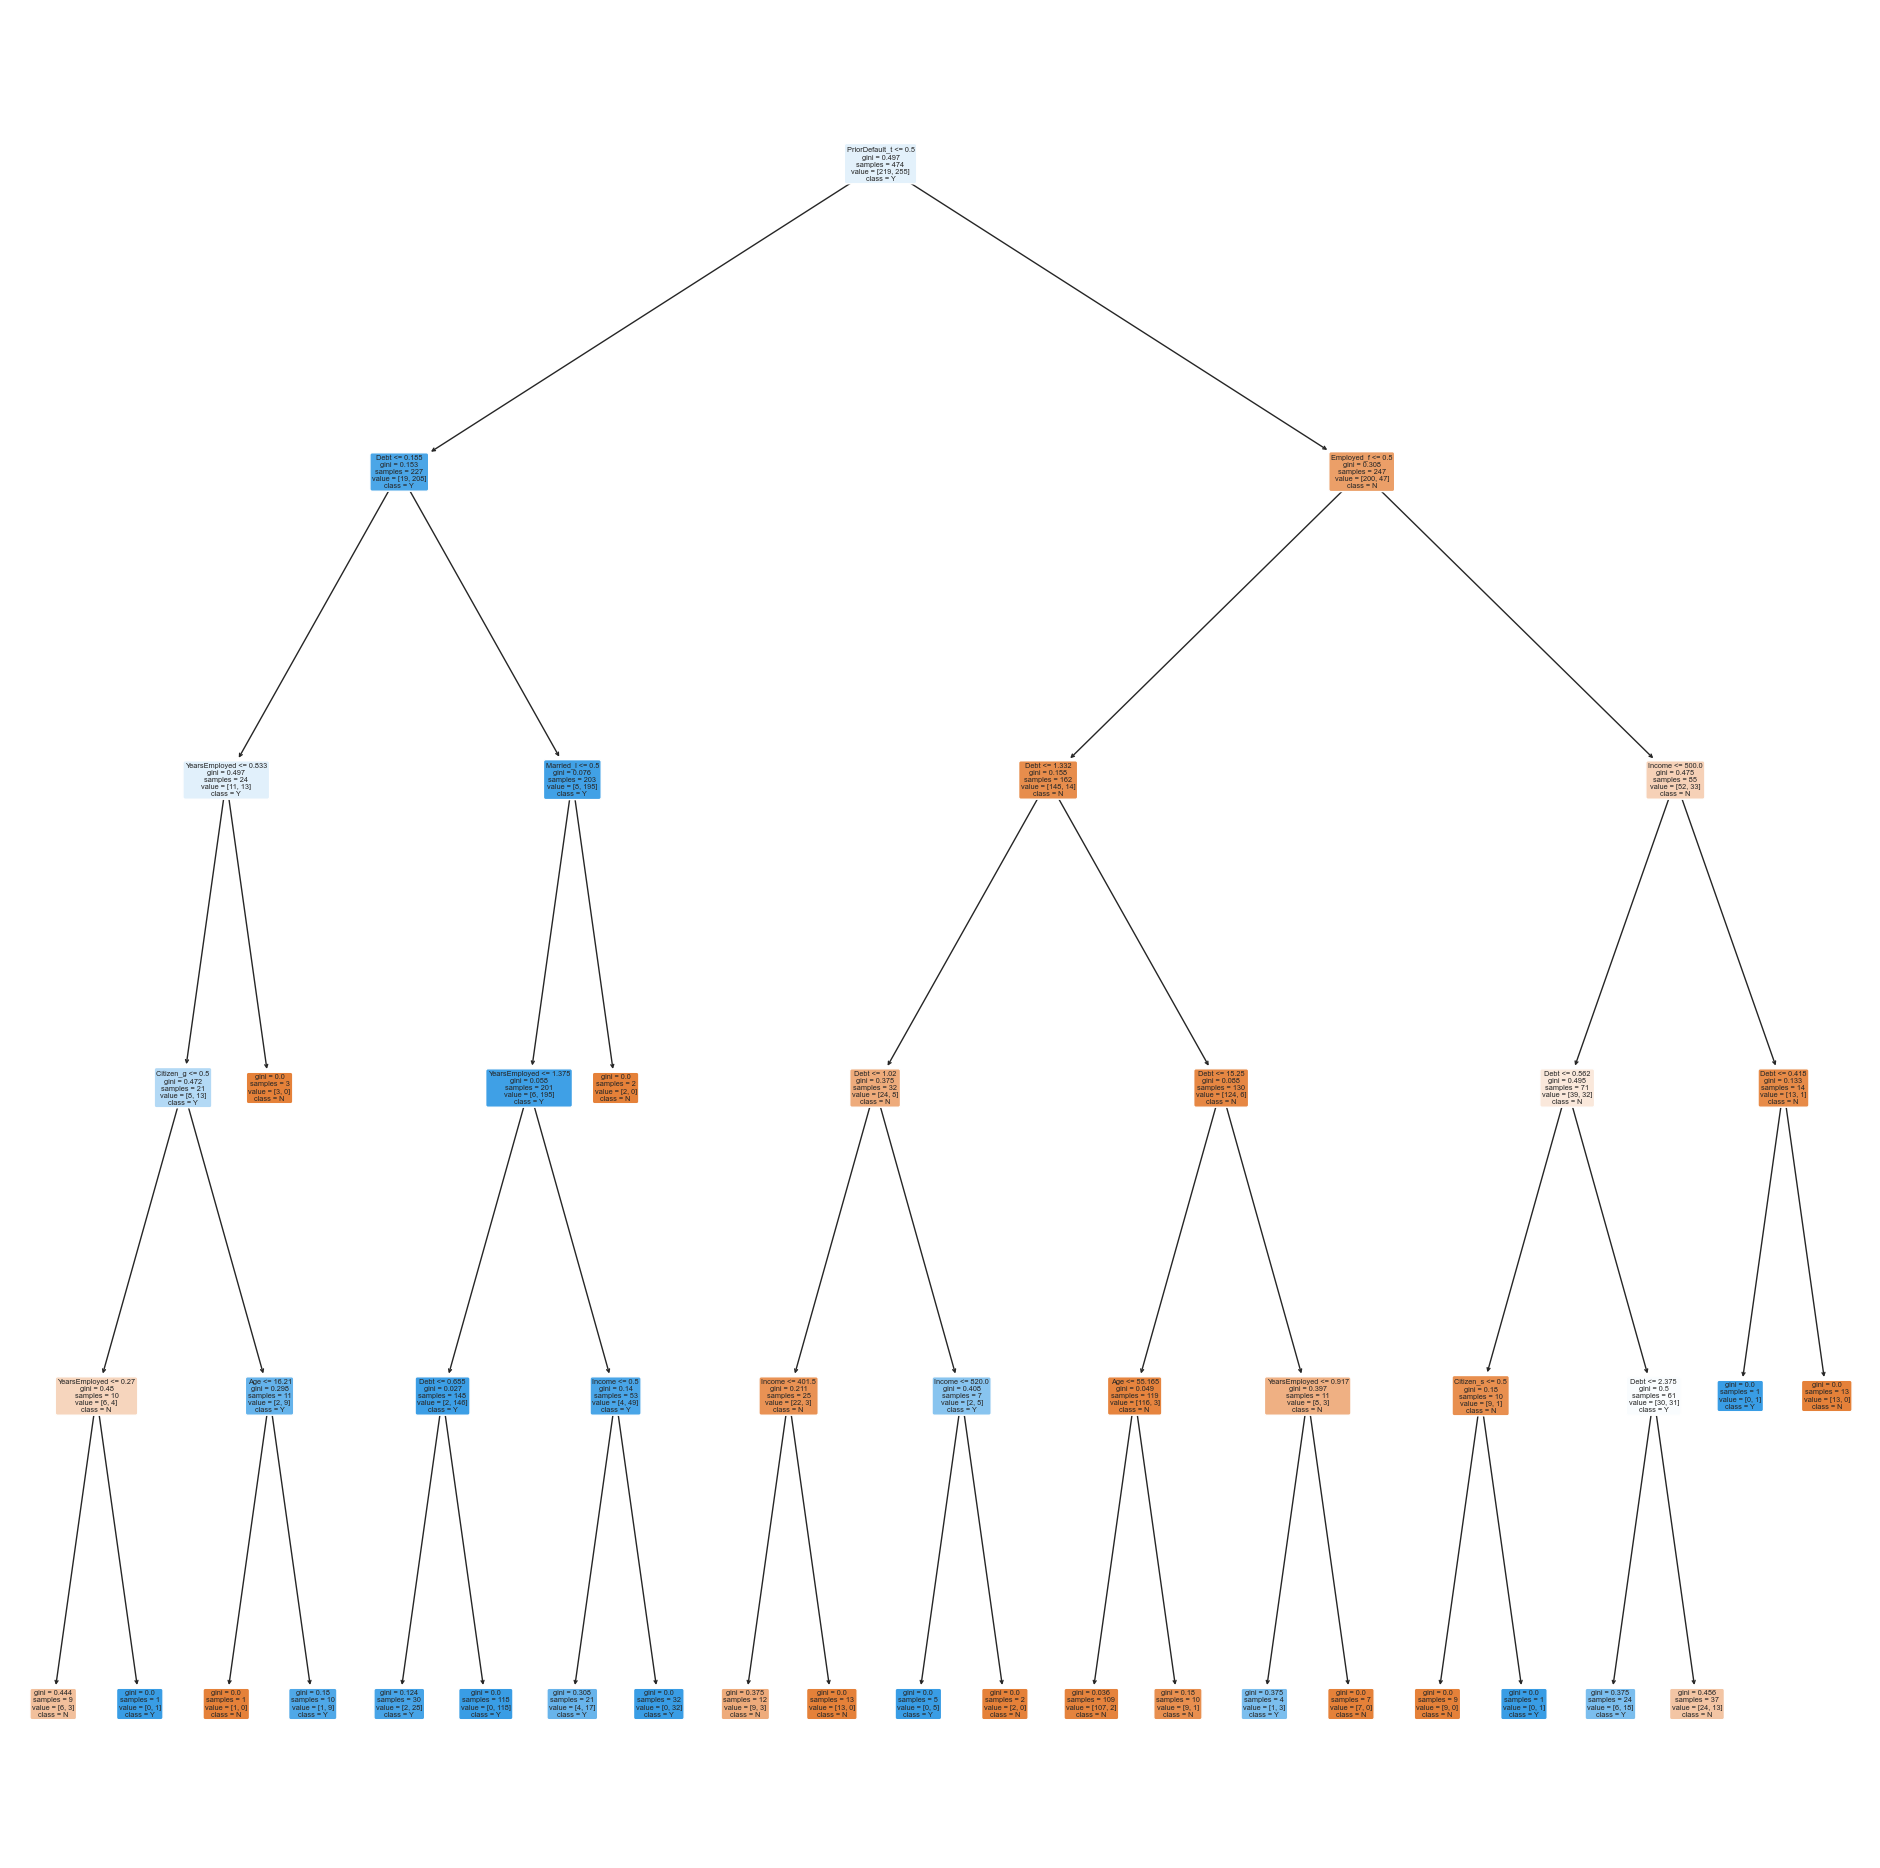

In [336]:
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

From the decision tree, we can see that variables such as `PriorDefault`, `Income` and `Debt`, really play a key role in predicting `Approved_Status`.

Train Data
Accuracy  :	 0.9240506329113924

TPR Train :	 0.9137254901960784
TNR Train :	 0.9360730593607306

FPR Train :	 0.0639269406392694
FNR Train :	 0.08627450980392157

Precision: 0.9031
Recall: 0.9361
F-score: 0.9193


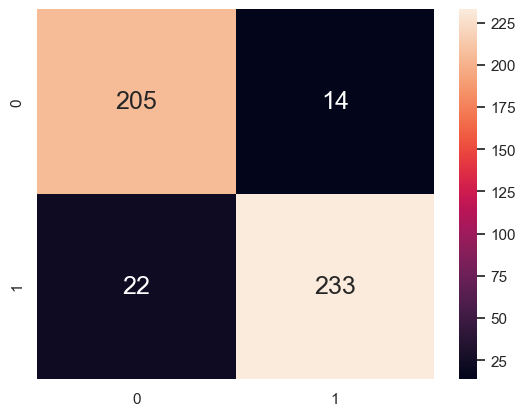

In [337]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
confusion_matrix_func(y_train,y_train_pred,'Train')

Test Data
Accuracy  :	 0.8578431372549019

TPR Test :	 0.8135593220338984
TNR Test :	 0.9186046511627907

FPR Test :	 0.08139534883720931
FNR Test :	 0.1864406779661017

Precision: 0.7822
Recall: 0.9186
F-score: 0.8449


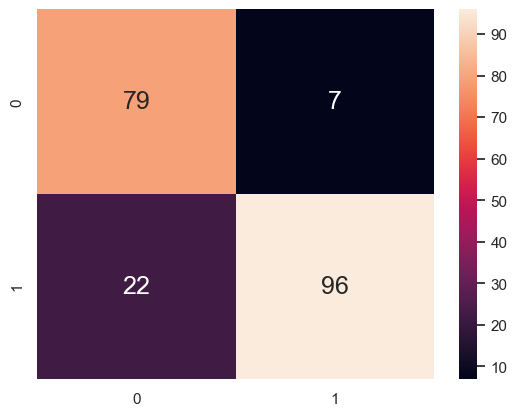

In [338]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

confusion_matrix_func(y_test,y_test_pred,'Test')

---

Model Training Attempt #2 (`Random Forest`)

Since we are dealing with a mix of numerical and categorical variables, `Random Forest` is an appropriate machine learning algorithm that can be applied here.

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators=500, max_depth=5)
y_train_pred, y_test_pred = randomforest(rforest,X_train, X_test, y_train, y_test)

Train Data
Accuracy  :	 0.9071729957805907

Test Data
Accuracy  :	 0.8480392156862745



TPR Train :	 0.8812260536398467
TNR Train :	 0.9389671361502347

FPR Train :	 0.06103286384976526
FNR Train :	 0.11877394636015326

Precision: 0.8658
Recall: 0.9390
F-score: 0.9009


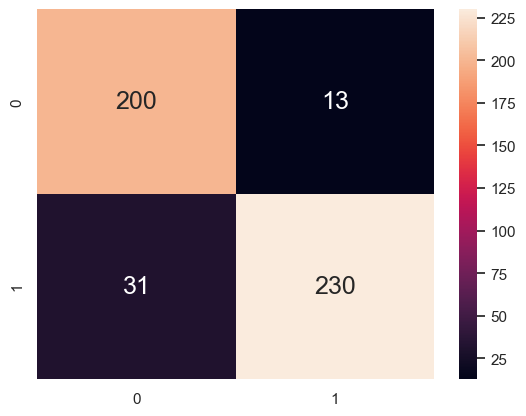

In [340]:
# Predict the Response corresponding to Predictors
confusion_matrix_func(y_train,y_train_pred,'Train')

TPR Test :	 0.7946428571428571
TNR Test :	 0.9130434782608695

FPR Test :	 0.08695652173913043
FNR Test :	 0.20535714285714285

Precision: 0.7850
Recall: 0.9130
F-score: 0.8442


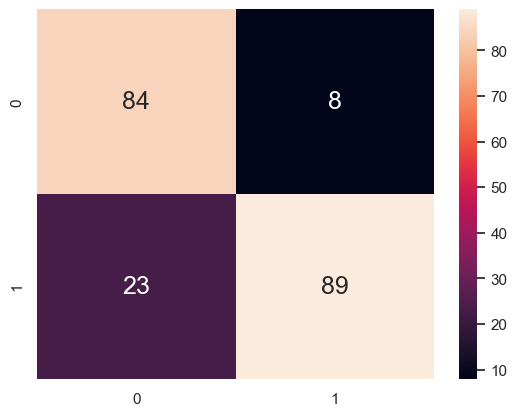

In [341]:
confusion_matrix_func(y_test,y_test_pred,'Test')

In [342]:
# Extract Response and Predictors
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [343]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Approved_Status.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [344]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=6, n_estimators=600)
0.8839865621500559


In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators=hpGrid.best_estimator_.n_estimators, max_depth=hpGrid.best_estimator_.max_depth)
y_train_pred, y_test_pred = randomforest(rforest,X_train, X_test, y_train, y_test)

Train Data
Accuracy  :	 0.9261603375527426

Test Data
Accuracy  :	 0.8823529411764706



Accuracy of the Test Data has improved slightly

From the `Random Forest` model, we can also use `feature_importances_` to identify based on the current model, what are the importance of each variable in predicting `Approved_Status`.

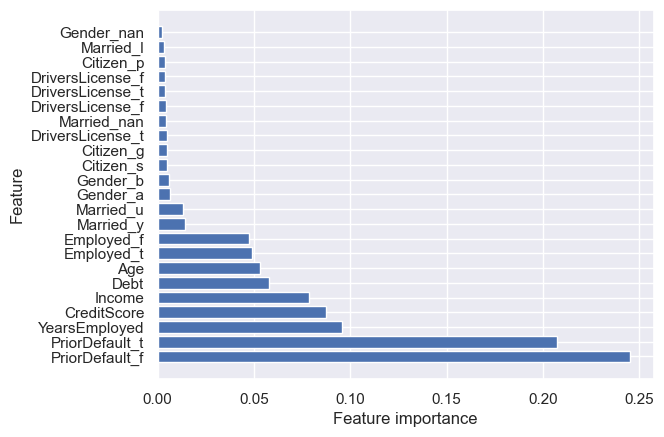

In [346]:
# Get feature importances
importances = rforest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create horizontal bar chart
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

Based on the above graph, we can determine the following variables play an important role in predicting `Approved_Status`: 

`Debt`, `Income`, `Employed`, `YearsEmployed`, `CreditScore`

`PriorDefault` is shown to be an extremely important variable

We can try training our model again using these variables exclusively

---

Model training attempt #3 (`Logistic Regression` using extracted variables)

`Logistic Regression` is another machine learning algorithm that is suited for binary classification. To apply this algorithm, we must first consider the linear relationship between the predictor and response variables.

Judging from our EDA, we have identified that the numerical variables have a rough linear relationship with `Approved_Status`.

In [347]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ccData_cat =ccData[['Employed','PriorDefault']]
ohe.fit(ccData_cat)
ccData_cat_ohe = pd.DataFrame(ohe.transform(ccData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(ccData_cat.columns))


ccData_num = ccData[['CreditScore','YearsEmployed','Income','Debt']]
ccData_res = ccData['Approved_Status']
ccData_ohe = pd.concat([ccData_num, ccData_cat_ohe, ccData_res], 
                           sort = False, axis = 1).reindex(ccData_num.index)

# Check the final dataframe
ccData_ohe.dropna(inplace=True)

y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

y = y.squeeze()

In [348]:
# Split the Dataset into Train and Test
X_train, X_test, y_train ,y_test =train_test_split(X,y,test_size=0.3)

In [349]:
# Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

`Standard Scaler` is used to scale continuous numerical variables so that they have a mean of 0 and a standard deviation of 1.

This helps to make the variables more comparable to each other and can improve the performance.

In [350]:
X_train_scaled

array([[-4.89182021e-01,  7.18161338e-02, -1.49958900e-01, ...,
        -8.73369179e-01,  1.04014256e+00, -1.04014256e+00],
       [-4.89182021e-01,  6.03260282e-02, -1.83464619e-01, ...,
        -8.73369179e-01,  1.04014256e+00, -1.04014256e+00],
       [-4.89182021e-01, -6.10408888e-01, -1.35551441e-01, ...,
        -8.73369179e-01,  1.04014256e+00, -1.04014256e+00],
       ...,
       [-4.89182021e-01, -5.85992414e-01, -1.76763475e-01, ...,
        -8.73369179e-01,  1.04014256e+00, -1.04014256e+00],
       [-4.89182021e-01,  2.97362982e-06, -1.83464619e-01, ...,
        -8.73369179e-01,  1.04014256e+00, -1.04014256e+00],
       [-4.89182021e-01, -2.15436507e-01, -1.83297090e-01, ...,
        -8.73369179e-01,  1.04014256e+00, -1.04014256e+00]])

In [351]:
model = LogisticRegression()
y_train_pred,y_test_pred =  logistic_regression(model,X_train_scaled,X_test_scaled,y_train,y_test)

Train Accuracy: 0.855072463768116
 Test Accuracy: 0.8454106280193237


TPR Train :	 0.8014981273408239
TNR Train :	 0.9212962962962963

FPR Train :	 0.0787037037037037
FNR Train :	 0.19850187265917604

Precision: 0.7897
Recall: 0.9213
F-score: 0.8504


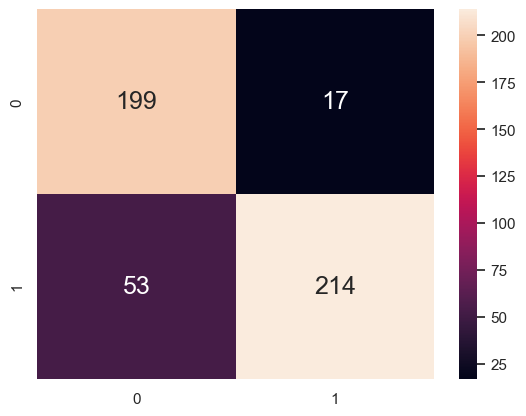

In [352]:
confusion_matrix_func(y_train,y_train_pred,'Train')

TPR Test :	 0.853448275862069
TNR Test :	 0.8351648351648352

FPR Test :	 0.16483516483516483
FNR Test :	 0.14655172413793102

Precision: 0.8172
Recall: 0.8352
F-score: 0.8261


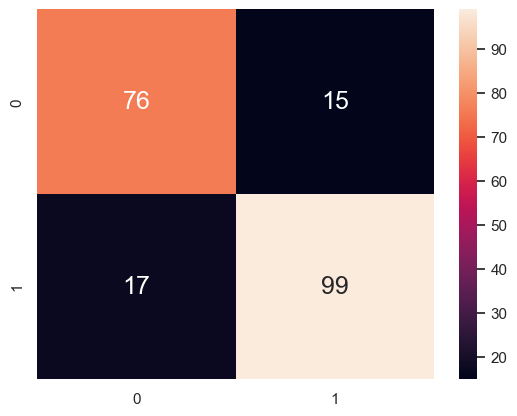

In [353]:
confusion_matrix_func(y_test,y_test_pred,'Test')

----

Model Training Attempt #4 (`Random Forest` using extracted variables)

In [354]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
ccData_cat =ccData[['Employed','PriorDefault']]
ohe.fit(ccData_cat)
ccData_cat_ohe = pd.DataFrame(ohe.transform(ccData_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(ccData_cat.columns))

# Check the encoded variables
ccData_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Employed_f      690 non-null    float64
 1   Employed_t      690 non-null    float64
 2   PriorDefault_f  690 non-null    float64
 3   PriorDefault_t  690 non-null    float64
dtypes: float64(4)
memory usage: 21.7 KB


In [355]:
# Combining Numeric features with the OHE Categorical features
ccData_num = ccData[['CreditScore','YearsEmployed','Income','Debt']]
ccData_res = ccData['Approved_Status']
ccData_ohe = pd.concat([ccData_num, ccData_cat_ohe, ccData_res], 
                           sort = False, axis = 1).reindex(ccData_num.index)

# Check the final dataframe
ccData_ohe.dropna(inplace=True)
ccData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      690 non-null    int64  
 1   YearsEmployed    690 non-null    float64
 2   Income           690 non-null    int64  
 3   Debt             690 non-null    float64
 4   Employed_f       690 non-null    float64
 5   Employed_t       690 non-null    float64
 6   PriorDefault_f   690 non-null    float64
 7   PriorDefault_t   690 non-null    float64
 8   Approved_Status  690 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 48.6+ KB


In [356]:
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

rforest2 = RandomForestClassifier(n_estimators=500, max_depth=4)

y_train_pred,y_test_pred = randomforest( rforest2,X_train, X_test, y_train, y_test )
# rforest2.fit(X_train,y_train.Approved_Status.ravel())

Train Data
Accuracy  :	 0.865424430641822

Test Data
Accuracy  :	 0.8792270531400966



TPR Train :	 0.8678571428571429
TNR Train :	 0.8620689655172413

FPR Train :	 0.13793103448275862
FNR Train :	 0.13214285714285715

Precision: 0.8255
Recall: 0.8621
F-score: 0.8434


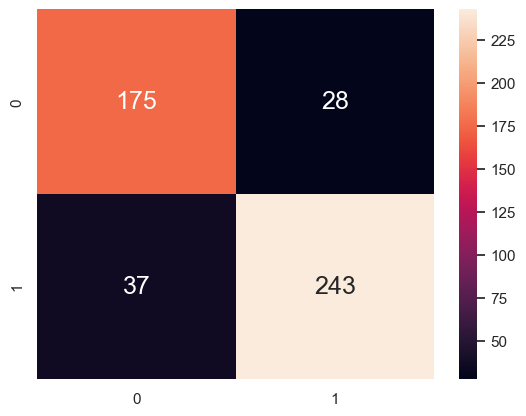

In [357]:
confusion_matrix_func(y_train,y_train_pred,'Train')

TPR Test :	 0.8932038834951457
TNR Test :	 0.8653846153846154

FPR Test :	 0.1346153846153846
FNR Test :	 0.10679611650485436

Precision: 0.8911
Recall: 0.8654
F-score: 0.8780


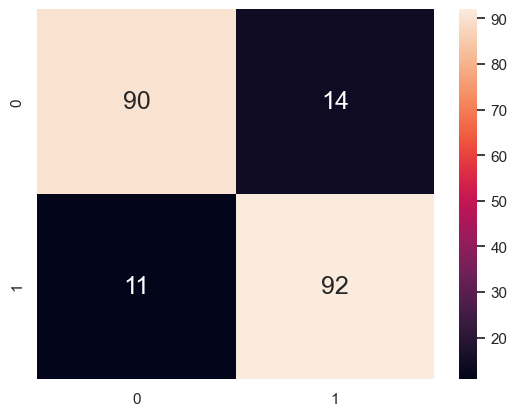

In [358]:
confusion_matrix_func(y_test,y_test_pred,'Test')

In [359]:
# Extract Response and Predictors
y = pd.DataFrame(ccData_ohe['Approved_Status'])
X = pd.DataFrame(ccData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [360]:
# Import GridSearch for hyperparameter tuning using Cross-Validation (CV)

# Define the Hyper-parameter Grid to search on, in case of Random Forest
param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
              'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

# Create the Hyper-parameter Grid
hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                      param_grid,                 # the search grid
                      cv = 5,                     # 5-fold cross-validation
                      scoring = 'accuracy')       # score to evaluate

# Train the models using Cross-Validation
hpGrid.fit(X_train, y_train.Approved_Status.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [361]:
# Fetch the best Model or the best set of Hyper-parameters
print(hpGrid.best_estimator_)

# Print the score (accuracy) of the best Model after CV
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=3, n_estimators=900)
0.8633161512027492


In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
rforest = RandomForestClassifier(n_estimators=hpGrid.best_estimator_.n_estimators, max_depth=hpGrid.best_estimator_.max_depth)
y_train_pred, y_test_pred = randomforest(rforest,X_train, X_test, y_train, y_test)

Train Data
Accuracy  :	 0.8799171842650103

Test Data
Accuracy  :	 0.8405797101449275



TPR Train :	 0.8409090909090909
TNR Train :	 0.9269406392694064

FPR Train :	 0.0730593607305936
FNR Train :	 0.1590909090909091

Precision: 0.8286
Recall: 0.9269
F-score: 0.8750


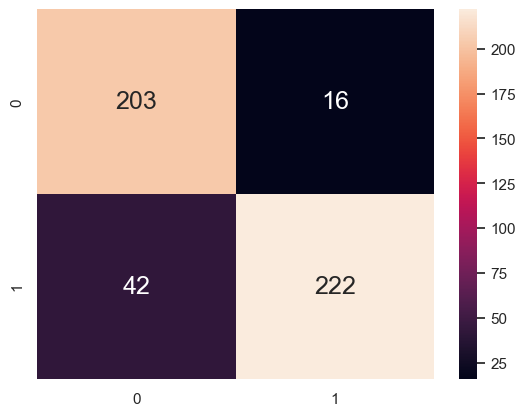

In [363]:
confusion_matrix_func(y_train,y_train_pred,'Train')

TPR Test :	 0.7983193277310925
TNR Test :	 0.8977272727272727

FPR Test :	 0.10227272727272728
FNR Test :	 0.20168067226890757

Precision: 0.7670
Recall: 0.8977
F-score: 0.8272


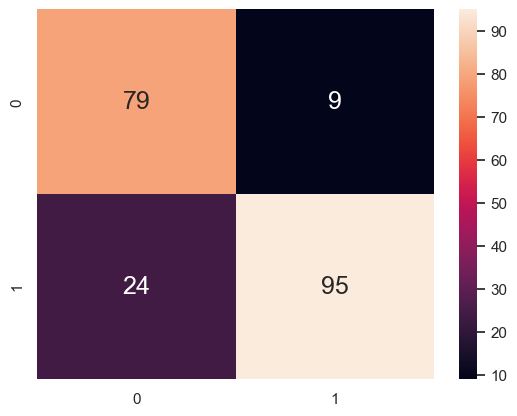

In [364]:
confusion_matrix_func(y_test,y_test_pred,'Test')

Training with identified variables exclusively has improved the accuracy as well.

---

Additional Model (`Resampling`)

In [365]:
Approved = ccData_ohe[ccData_ohe.Approved_Status == 'Approved']
Not_Approved = ccData_ohe[ccData_ohe.Approved_Status == 'Not Approved']
 
# Upsample the Bad samples
Not_Approved_up = resample(Not_Approved, 
                        replace=True,                     # sample with replacement
                        n_samples=Approved.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
creditData_ohe_up = pd.concat([Approved, Not_Approved_up])
 
# Check the ratio of the classes
creditData_ohe_up['Approved_Status'].value_counts()

Approved        307
Not Approved    307
Name: Approved_Status, dtype: int64

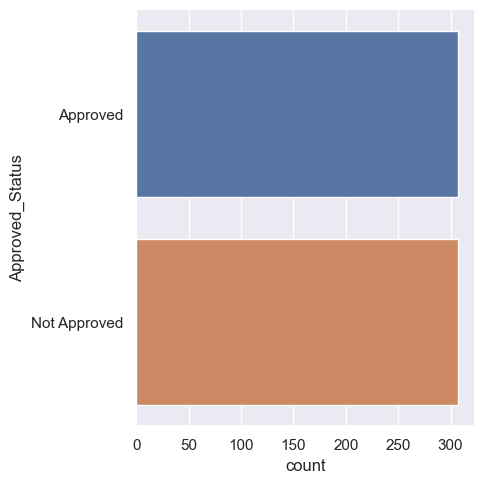

In [366]:
# Quick plot to check the balanced classes visually
sb.catplot(y = 'Approved_Status', data = creditData_ohe_up, kind = "count")

In [367]:
# Confirm that the OHE is still in place
# and that the samples have now increased
creditData_ohe_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 254
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      614 non-null    int64  
 1   YearsEmployed    614 non-null    float64
 2   Income           614 non-null    int64  
 3   Debt             614 non-null    float64
 4   Employed_f       614 non-null    float64
 5   Employed_t       614 non-null    float64
 6   PriorDefault_f   614 non-null    float64
 7   PriorDefault_t   614 non-null    float64
 8   Approved_Status  614 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 48.0+ KB


[Text(0.4880952380952381, 0.9, 'PriorDefault_f <= 0.5\ngini = 0.5\nsamples = 429\nvalue = [220, 209]\nclass = Approved'),
 Text(0.23809523809523808, 0.7, 'Income <= 520.0\ngini = 0.281\nsamples = 243\nvalue = [202, 41]\nclass = Approved'),
 Text(0.19047619047619047, 0.5, 'CreditScore <= 2.5\ngini = 0.378\nsamples = 162\nvalue = [121, 41]\nclass = Approved'),
 Text(0.09523809523809523, 0.3, 'Debt <= 0.605\ngini = 0.447\nsamples = 104\nvalue = [69, 35]\nclass = Approved'),
 Text(0.047619047619047616, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]\nclass = Approved'),
 Text(0.14285714285714285, 0.1, 'gini = 0.475\nsamples = 90\nvalue = [55, 35]\nclass = Approved'),
 Text(0.2857142857142857, 0.3, 'Debt <= 0.812\ngini = 0.185\nsamples = 58\nvalue = [52, 6]\nclass = Approved'),
 Text(0.23809523809523808, 0.1, 'gini = 0.463\nsamples = 11\nvalue = [7, 4]\nclass = Approved'),
 Text(0.3333333333333333, 0.1, 'gini = 0.081\nsamples = 47\nvalue = [45, 2]\nclass = Approved'),
 Text(0.28571428571428

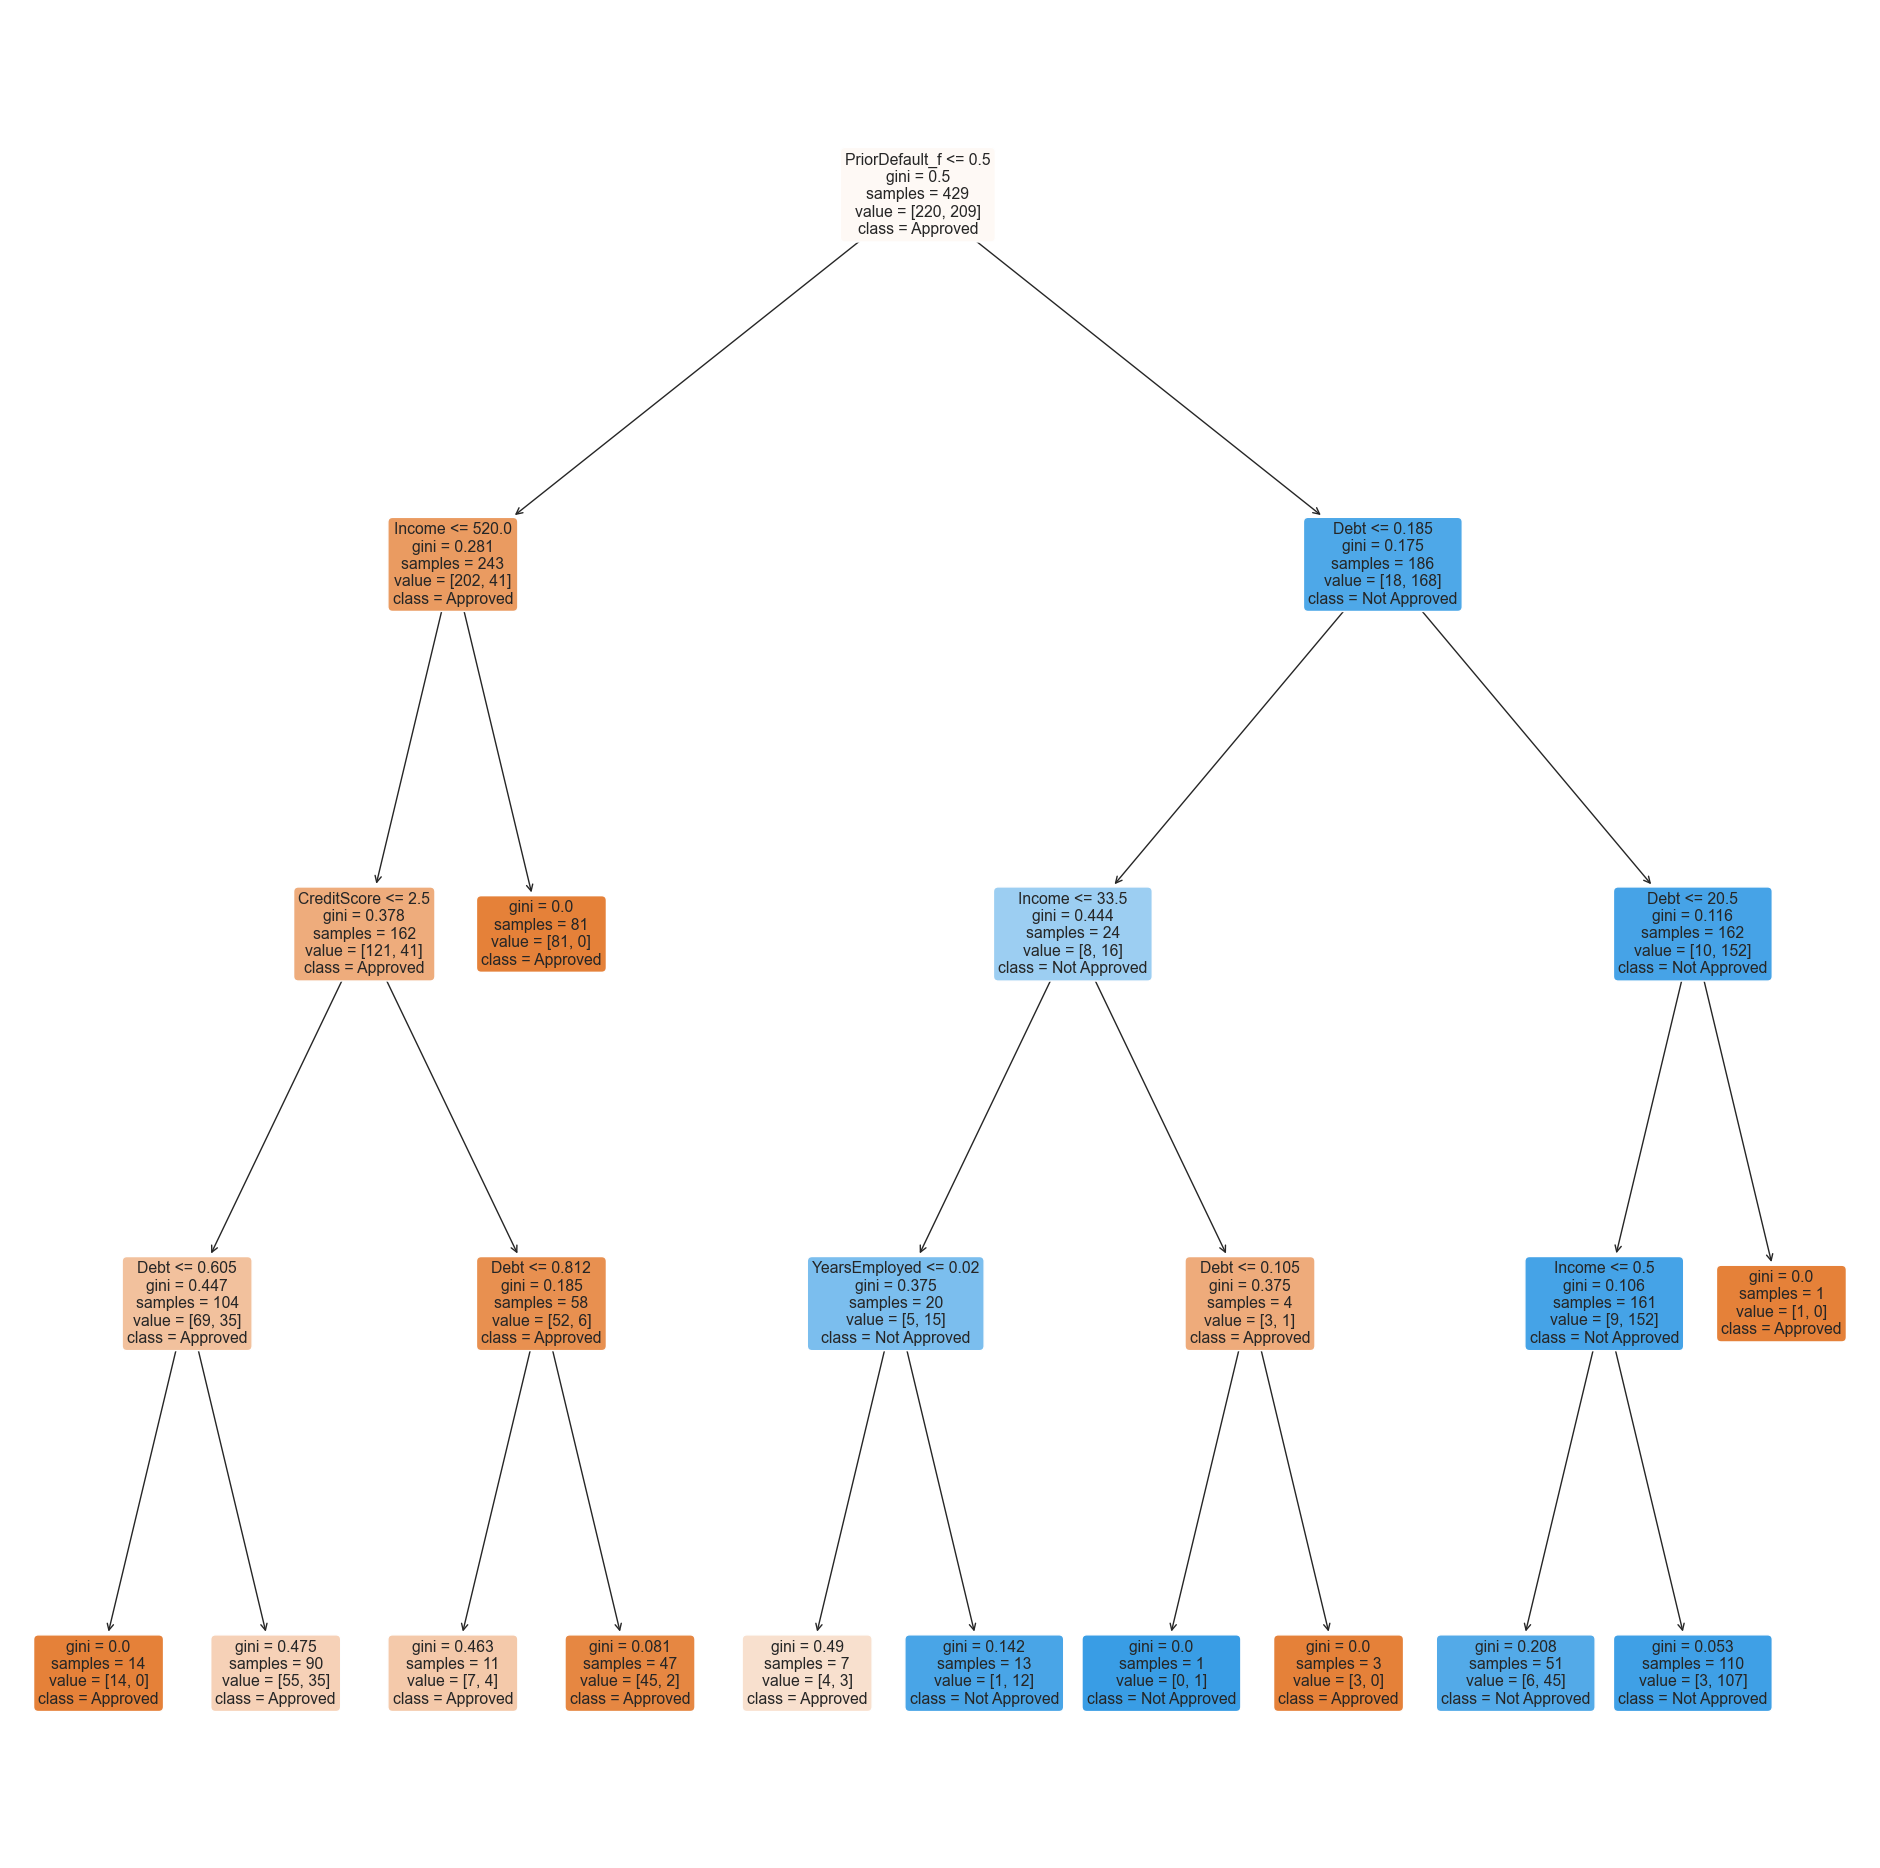

In [368]:
# Extract Response and Predictors
y = pd.DataFrame(creditData_ohe_up['Approved_Status'])
X = pd.DataFrame(creditData_ohe_up.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Approved","Not Approved"])

Train Data
Accuracy  :	 0.8741258741258742

TPR Train :	 0.7894736842105263
TNR Train :	 0.9545454545454546

FPR Train :	 0.045454545454545456
FNR Train :	 0.21052631578947367

Precision: 0.8268
Recall: 0.9545
F-score: 0.8861


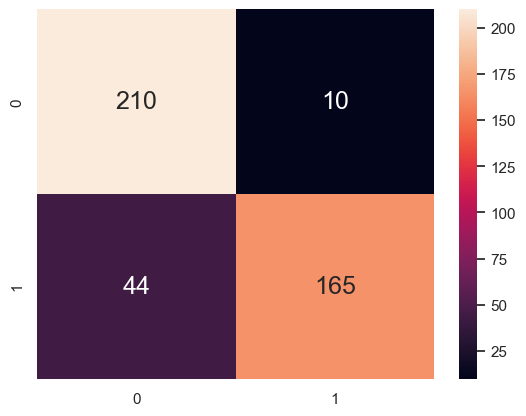

In [369]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

confusion_matrix_func(y_train,y_train_pred,'Train')

Test Data
Accuracy  :	 0.8486486486486486

TPR Test :	 0.7551020408163265
TNR Test :	 0.9540229885057471

FPR Test :	 0.04597701149425287
FNR Test :	 0.24489795918367346

Precision: 0.7757
Recall: 0.9540
F-score: 0.8557


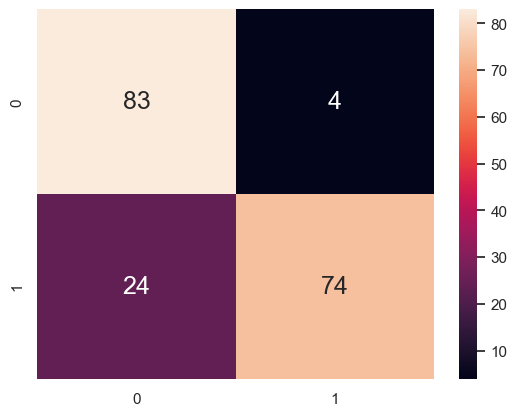

In [370]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

confusion_matrix_func(y_test,y_test_pred,'Test')

While `resampling` has shown to improve the accuracy of predictions significantly, it is usually applied when response data is limited or unbalanced. In our dataset, we have previously identified that the approval rate of credit cards is quite balanced, thus it may not be neccessary to apply `resampling`.